In [1]:
%matplotlib inline
import sys
import scipy as sp
import os
import h5py
import glob
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.pylab import cm 
import gromics.viz.axes as axs

In [2]:
K = 19
basedir = '/cluster/work/grlab/projects/metagenome/data/metasub/graphs_mccortex/output_k%i_cleaned_pstudy' % K
files = glob.glob(os.path.join(basedir, '*.stats'))
fnames = sp.array([os.path.basename(_) for _ in files])
samples = sp.unique([_.split('.')[0] for _ in fnames])
plotdir = os.path.join(basedir, 'plots')
if not os.path.exists(plotdir):
    os.makedirs(plotdir)

In [3]:
### collect data
all_data = []
for fname in files:
    all_data.append(sp.loadtxt(fname, dtype='float', delimiter='\t'))
all_data = sp.array(all_data)

In [4]:

all_data

array([[3.33721200e+06, 7.79300200e+07, 1.90000000e+01, 2.33518338e+01,
        2.36200000e+03],
       [3.22835100e+06, 7.69551550e+07, 2.20000000e+01, 2.38372950e+01,
        2.46400000e+03],
       [2.53717400e+06, 5.45500430e+07, 2.00000000e+01, 2.15003161e+01,
        6.18000000e+02],
       ...,
       [1.20402100e+06, 3.87602150e+07, 1.90000000e+01, 3.21923081e+01,
        1.52400000e+03],
       [2.76143300e+06, 6.29691800e+07, 2.00000000e+01, 2.28030809e+01,
        2.84100000e+03],
       [1.21351250e+07, 3.98273336e+08, 2.00000000e+01, 3.28198792e+01,
        9.62000000e+02]])

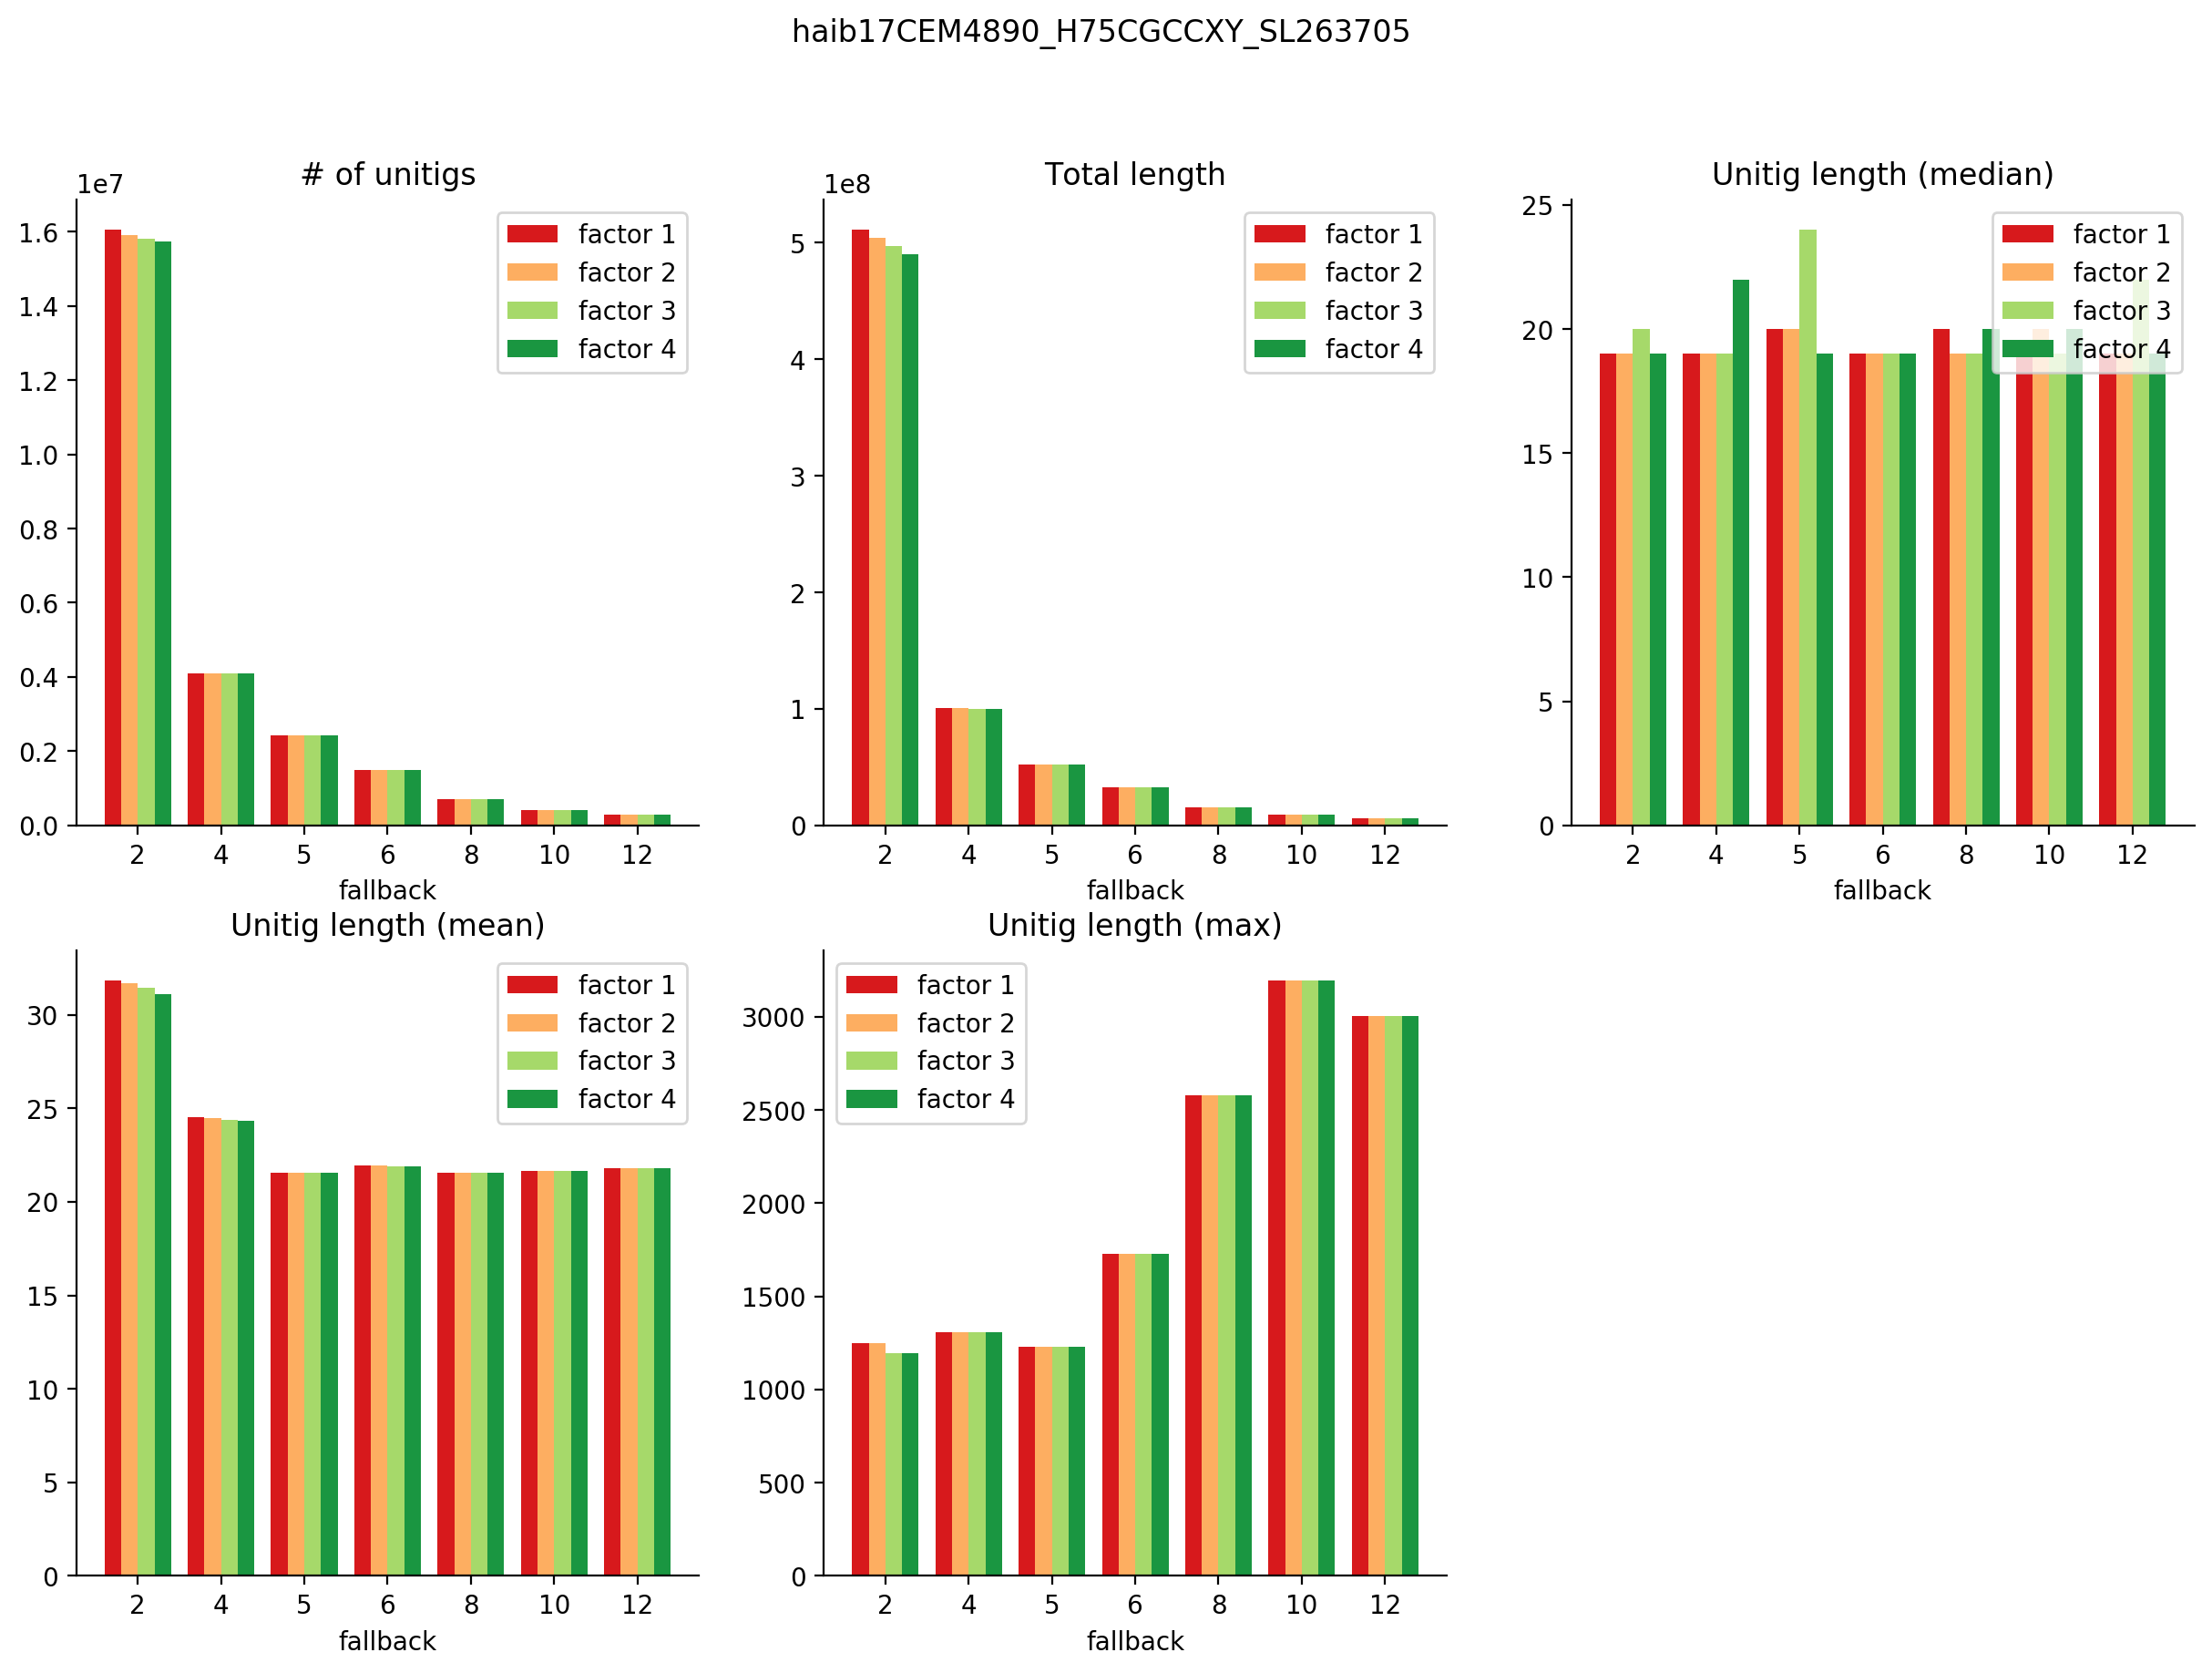

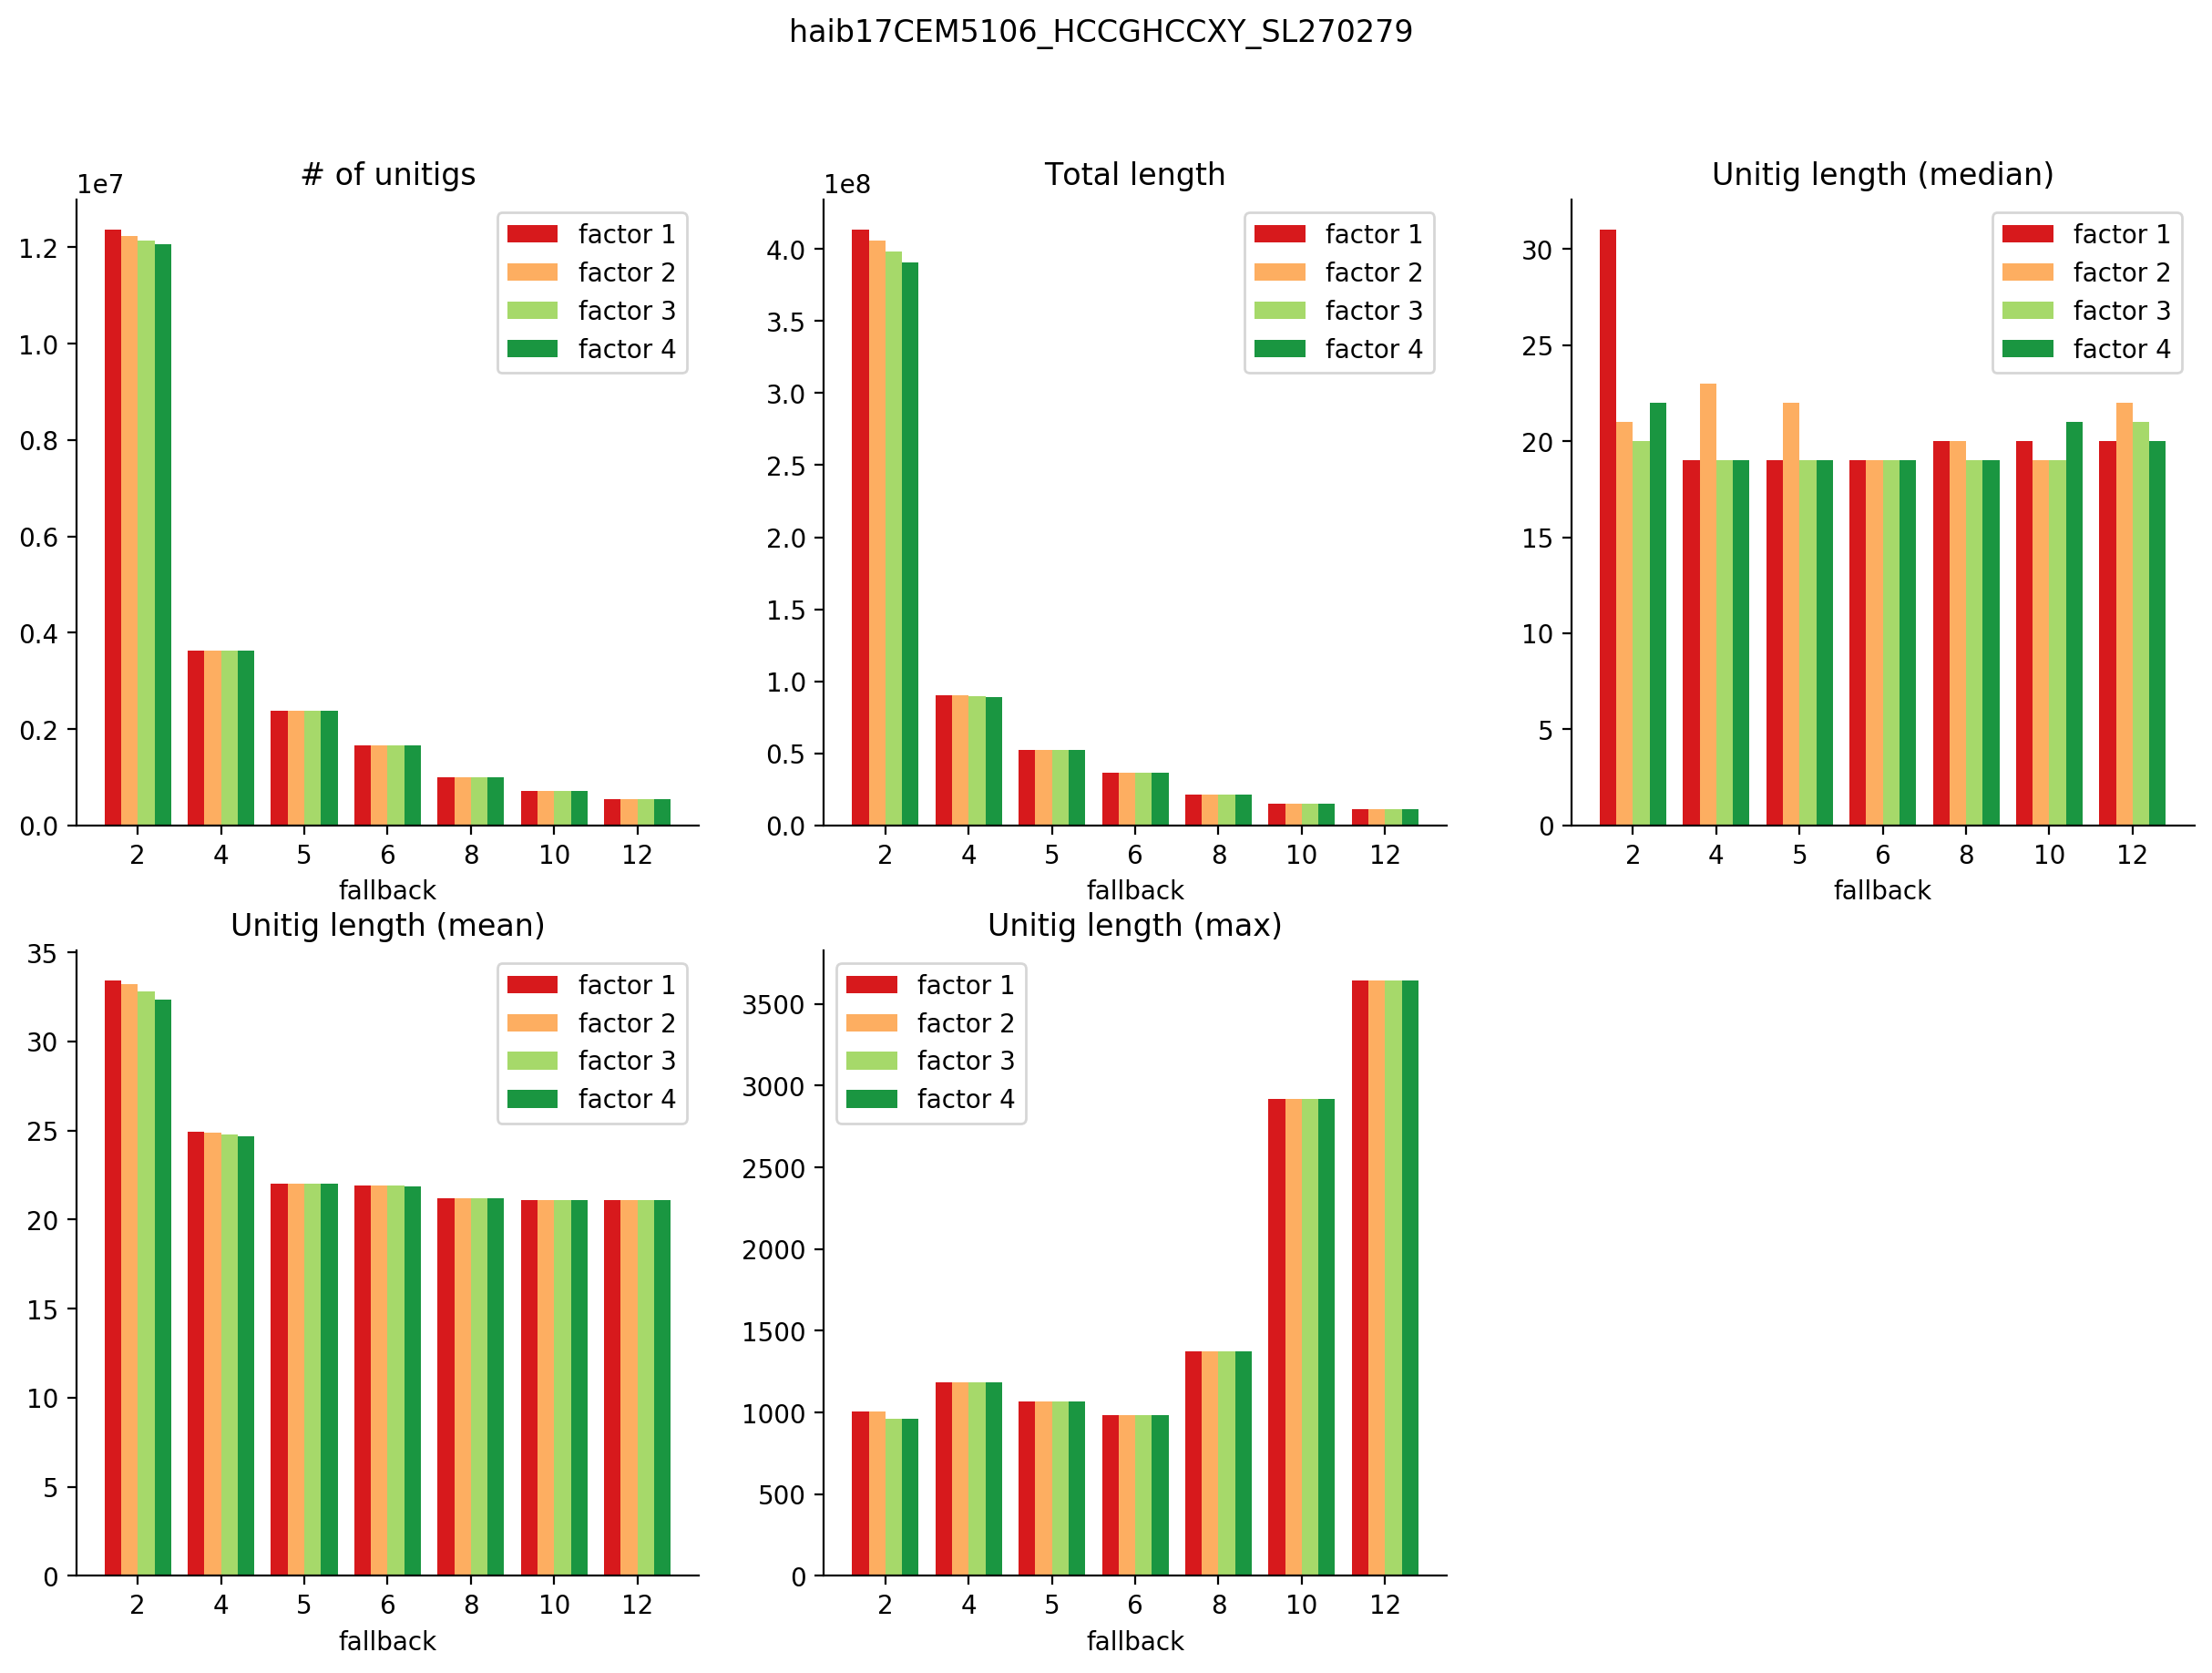

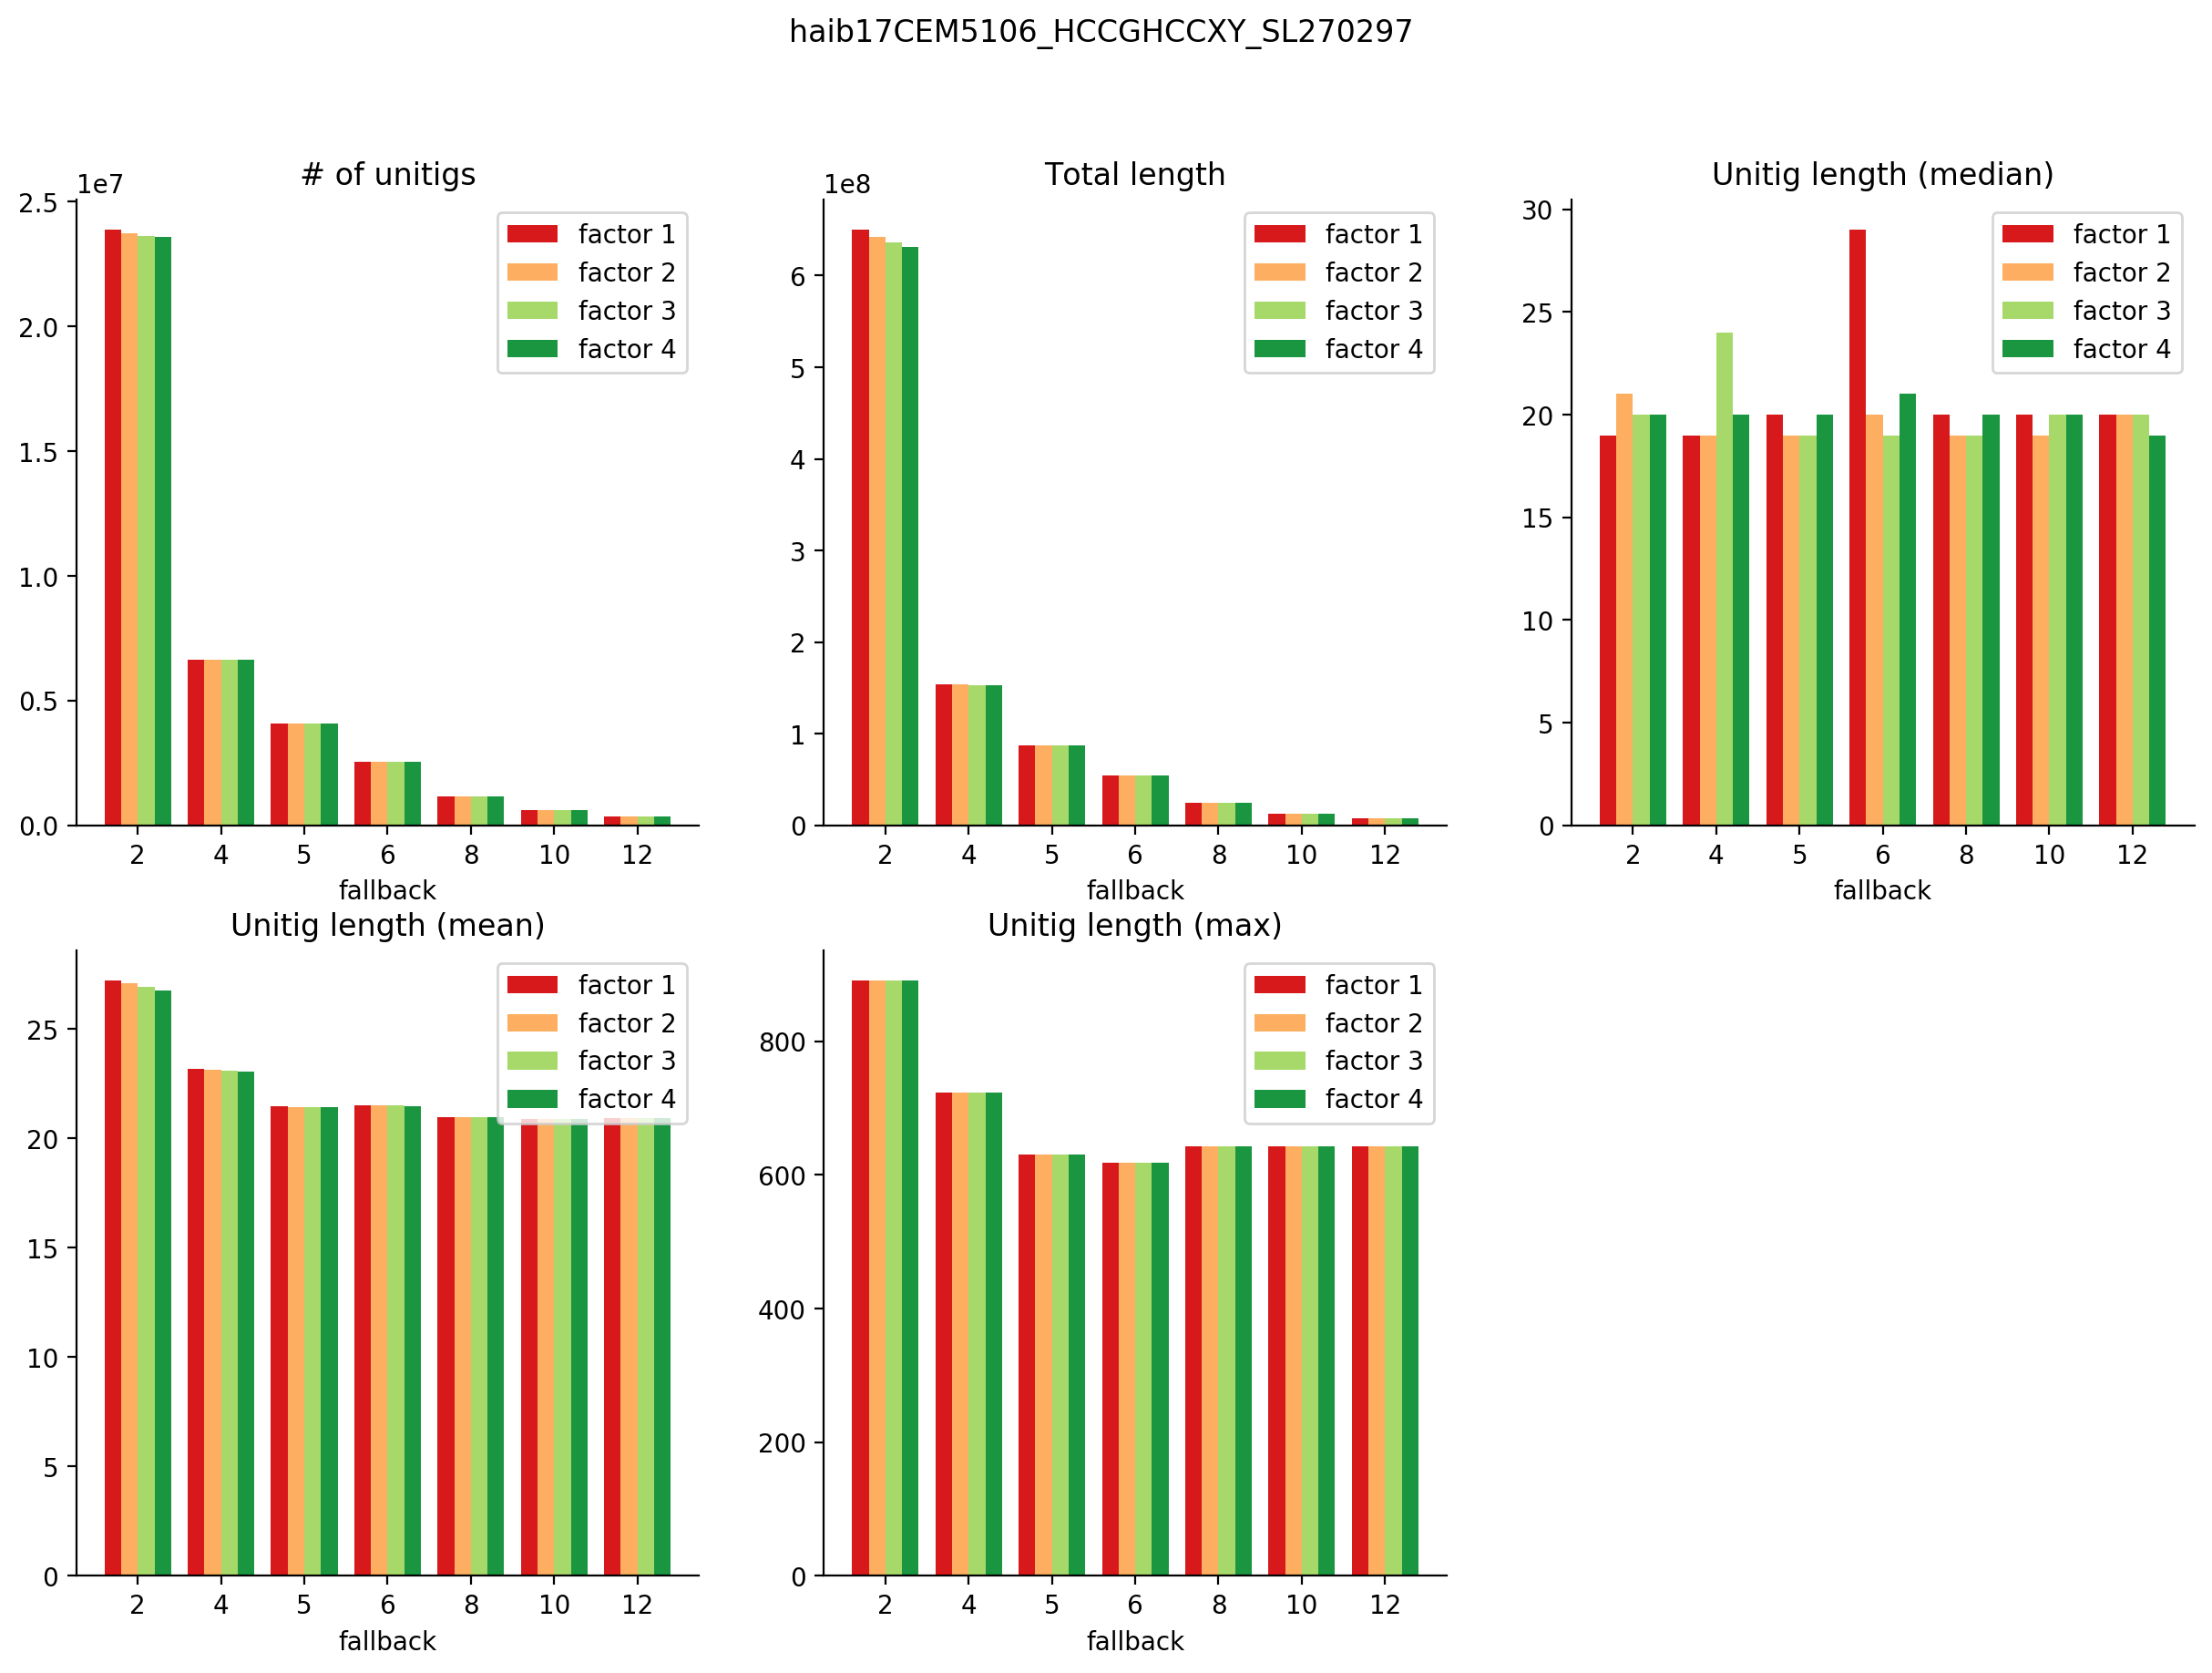

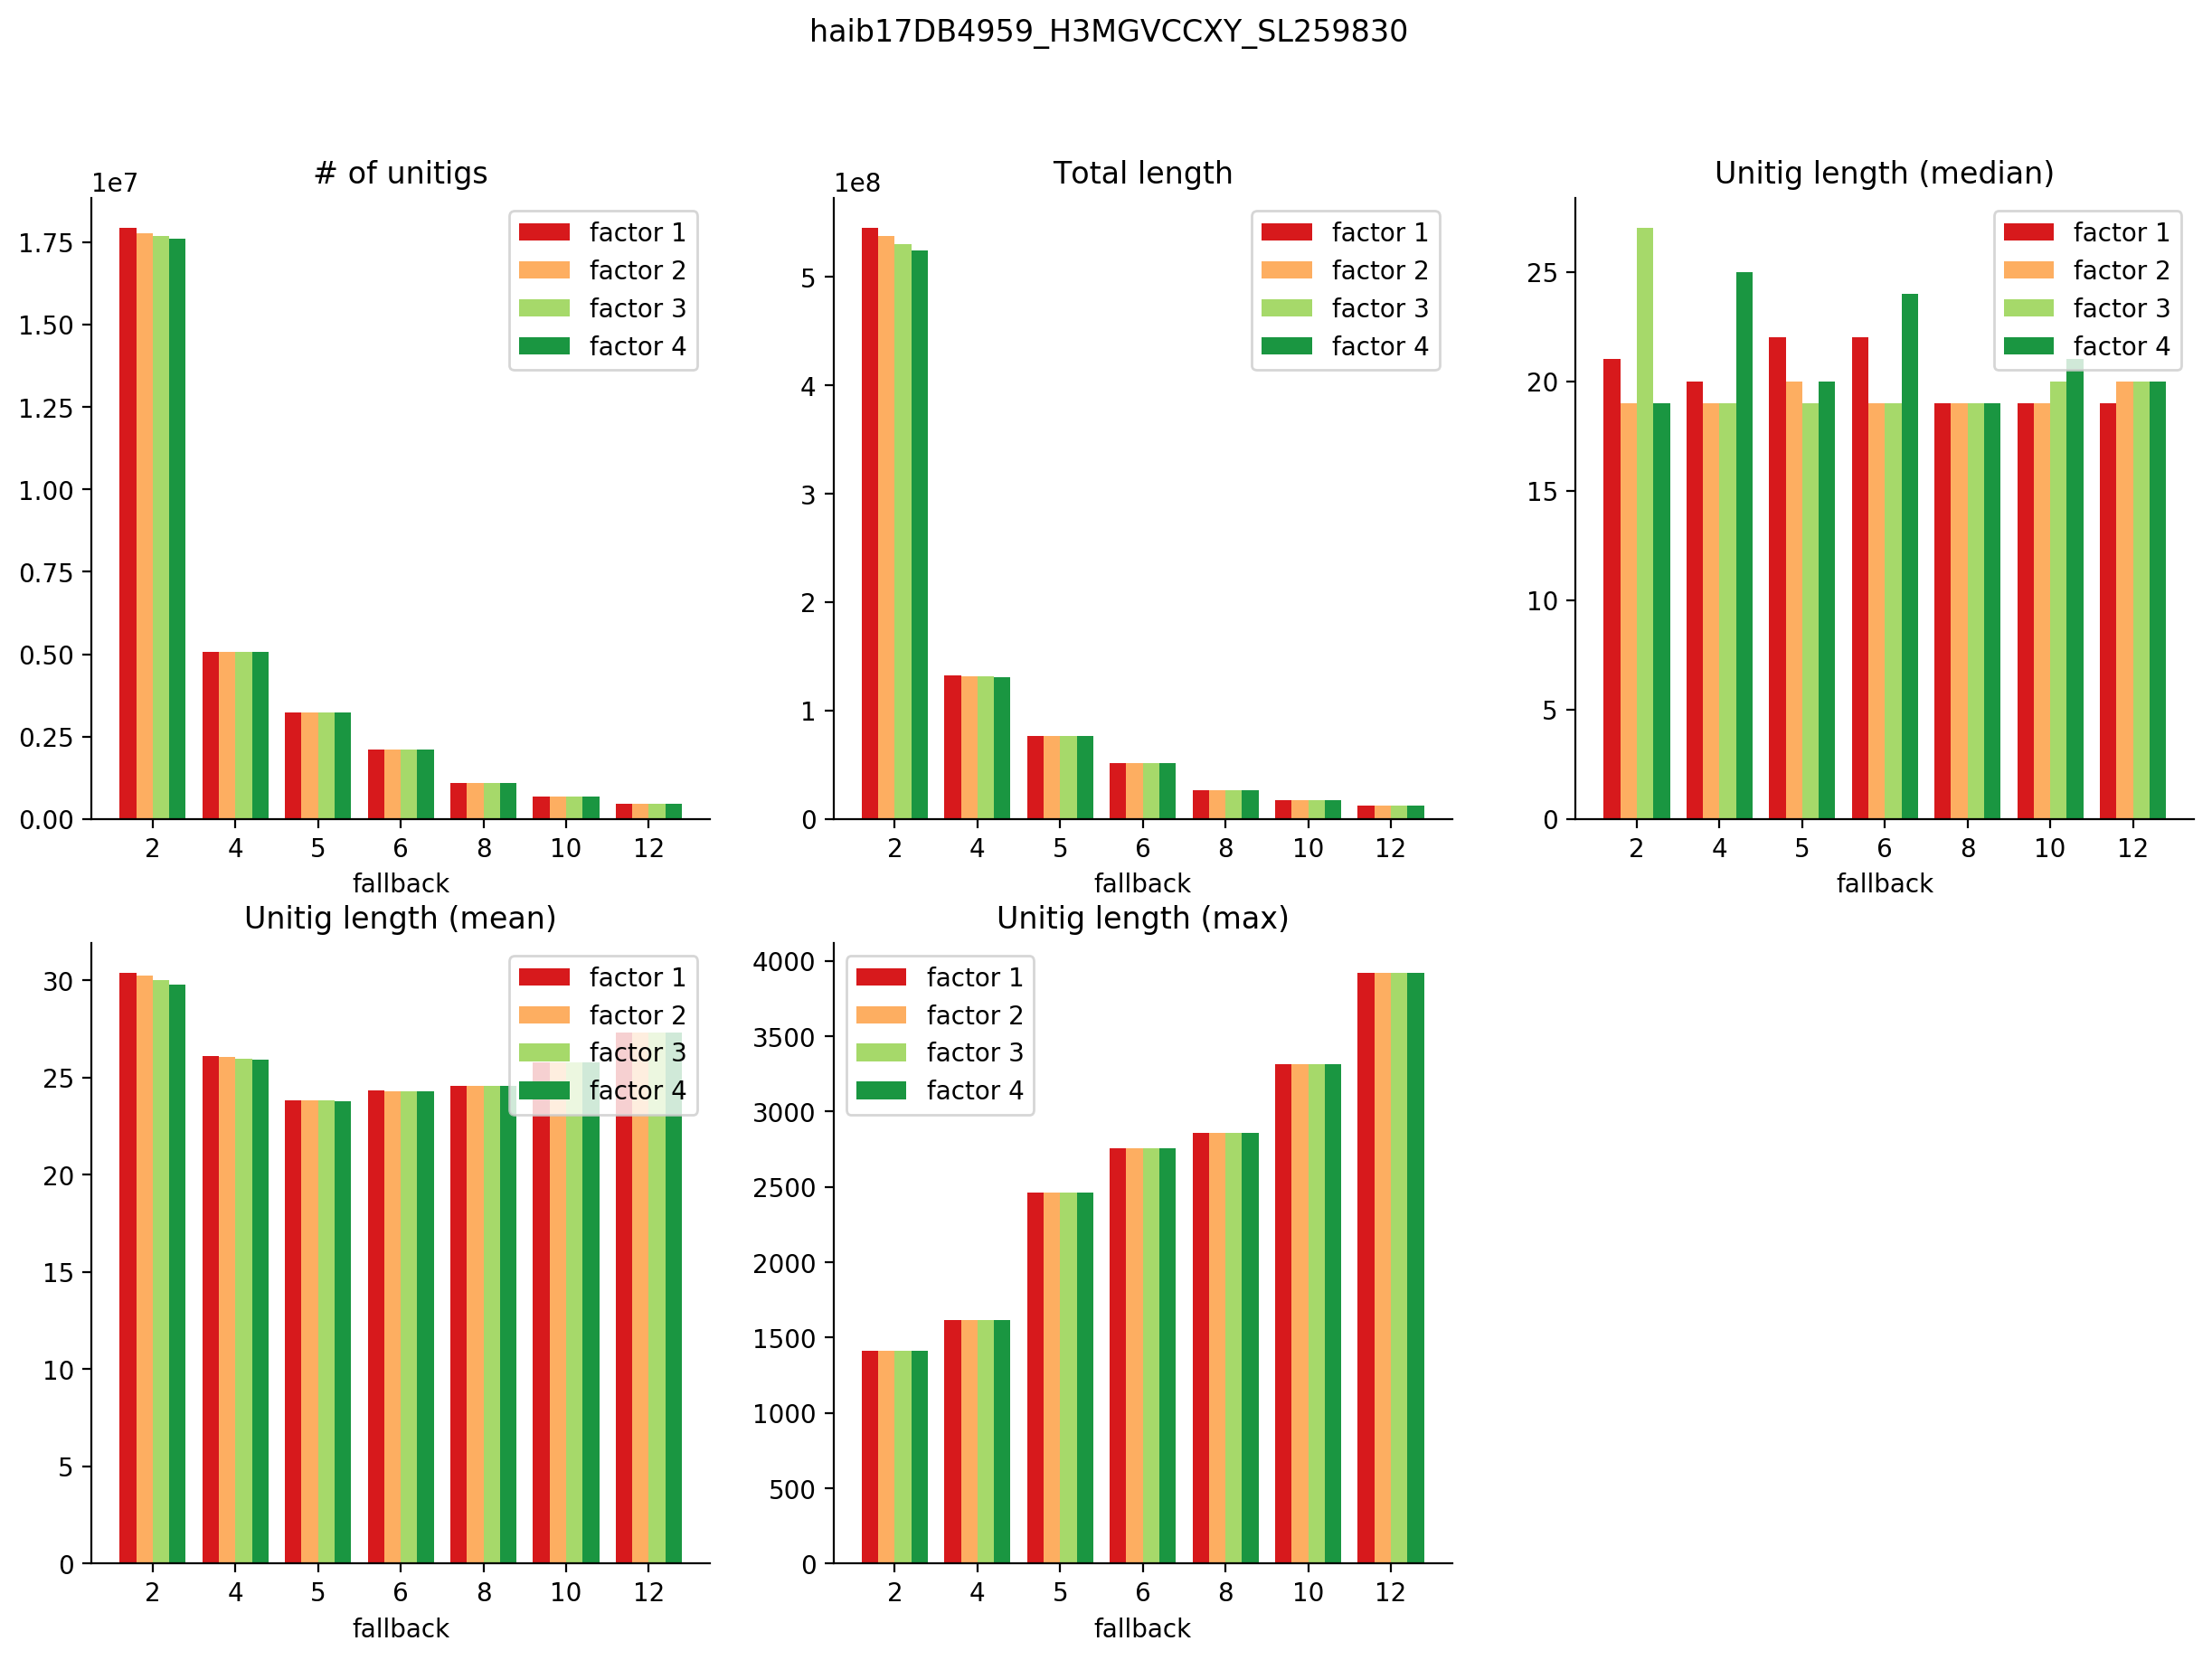

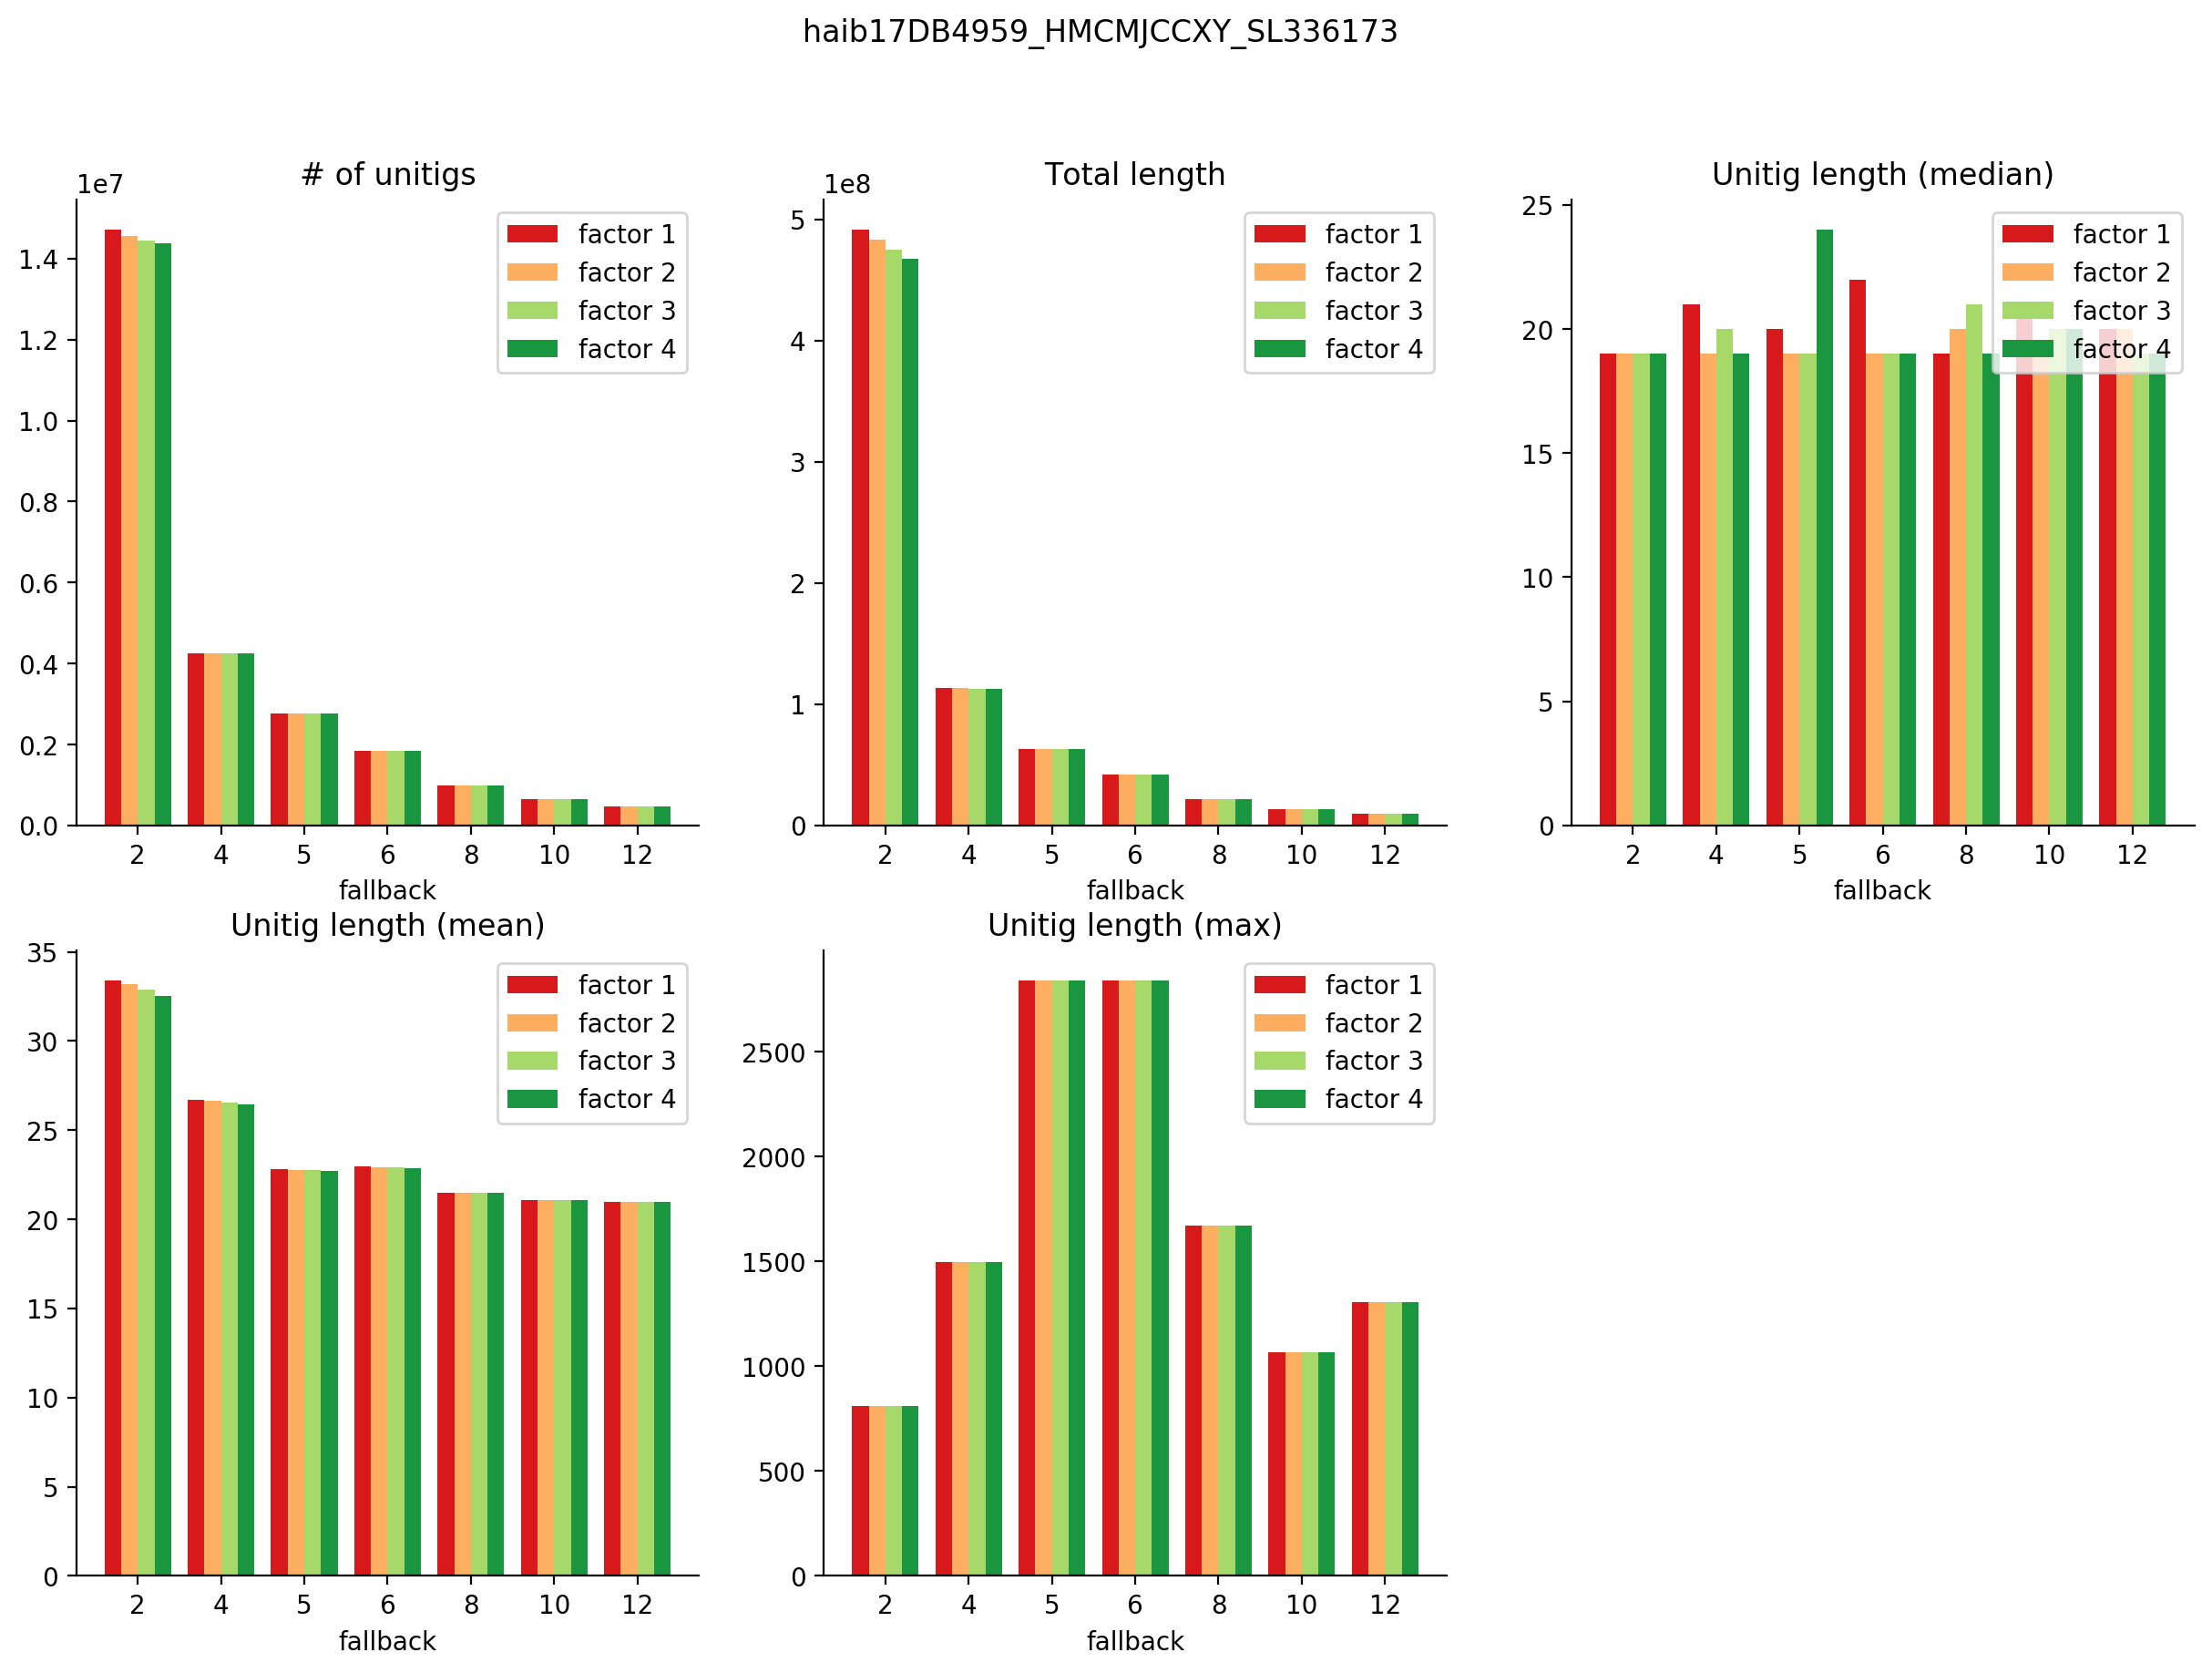

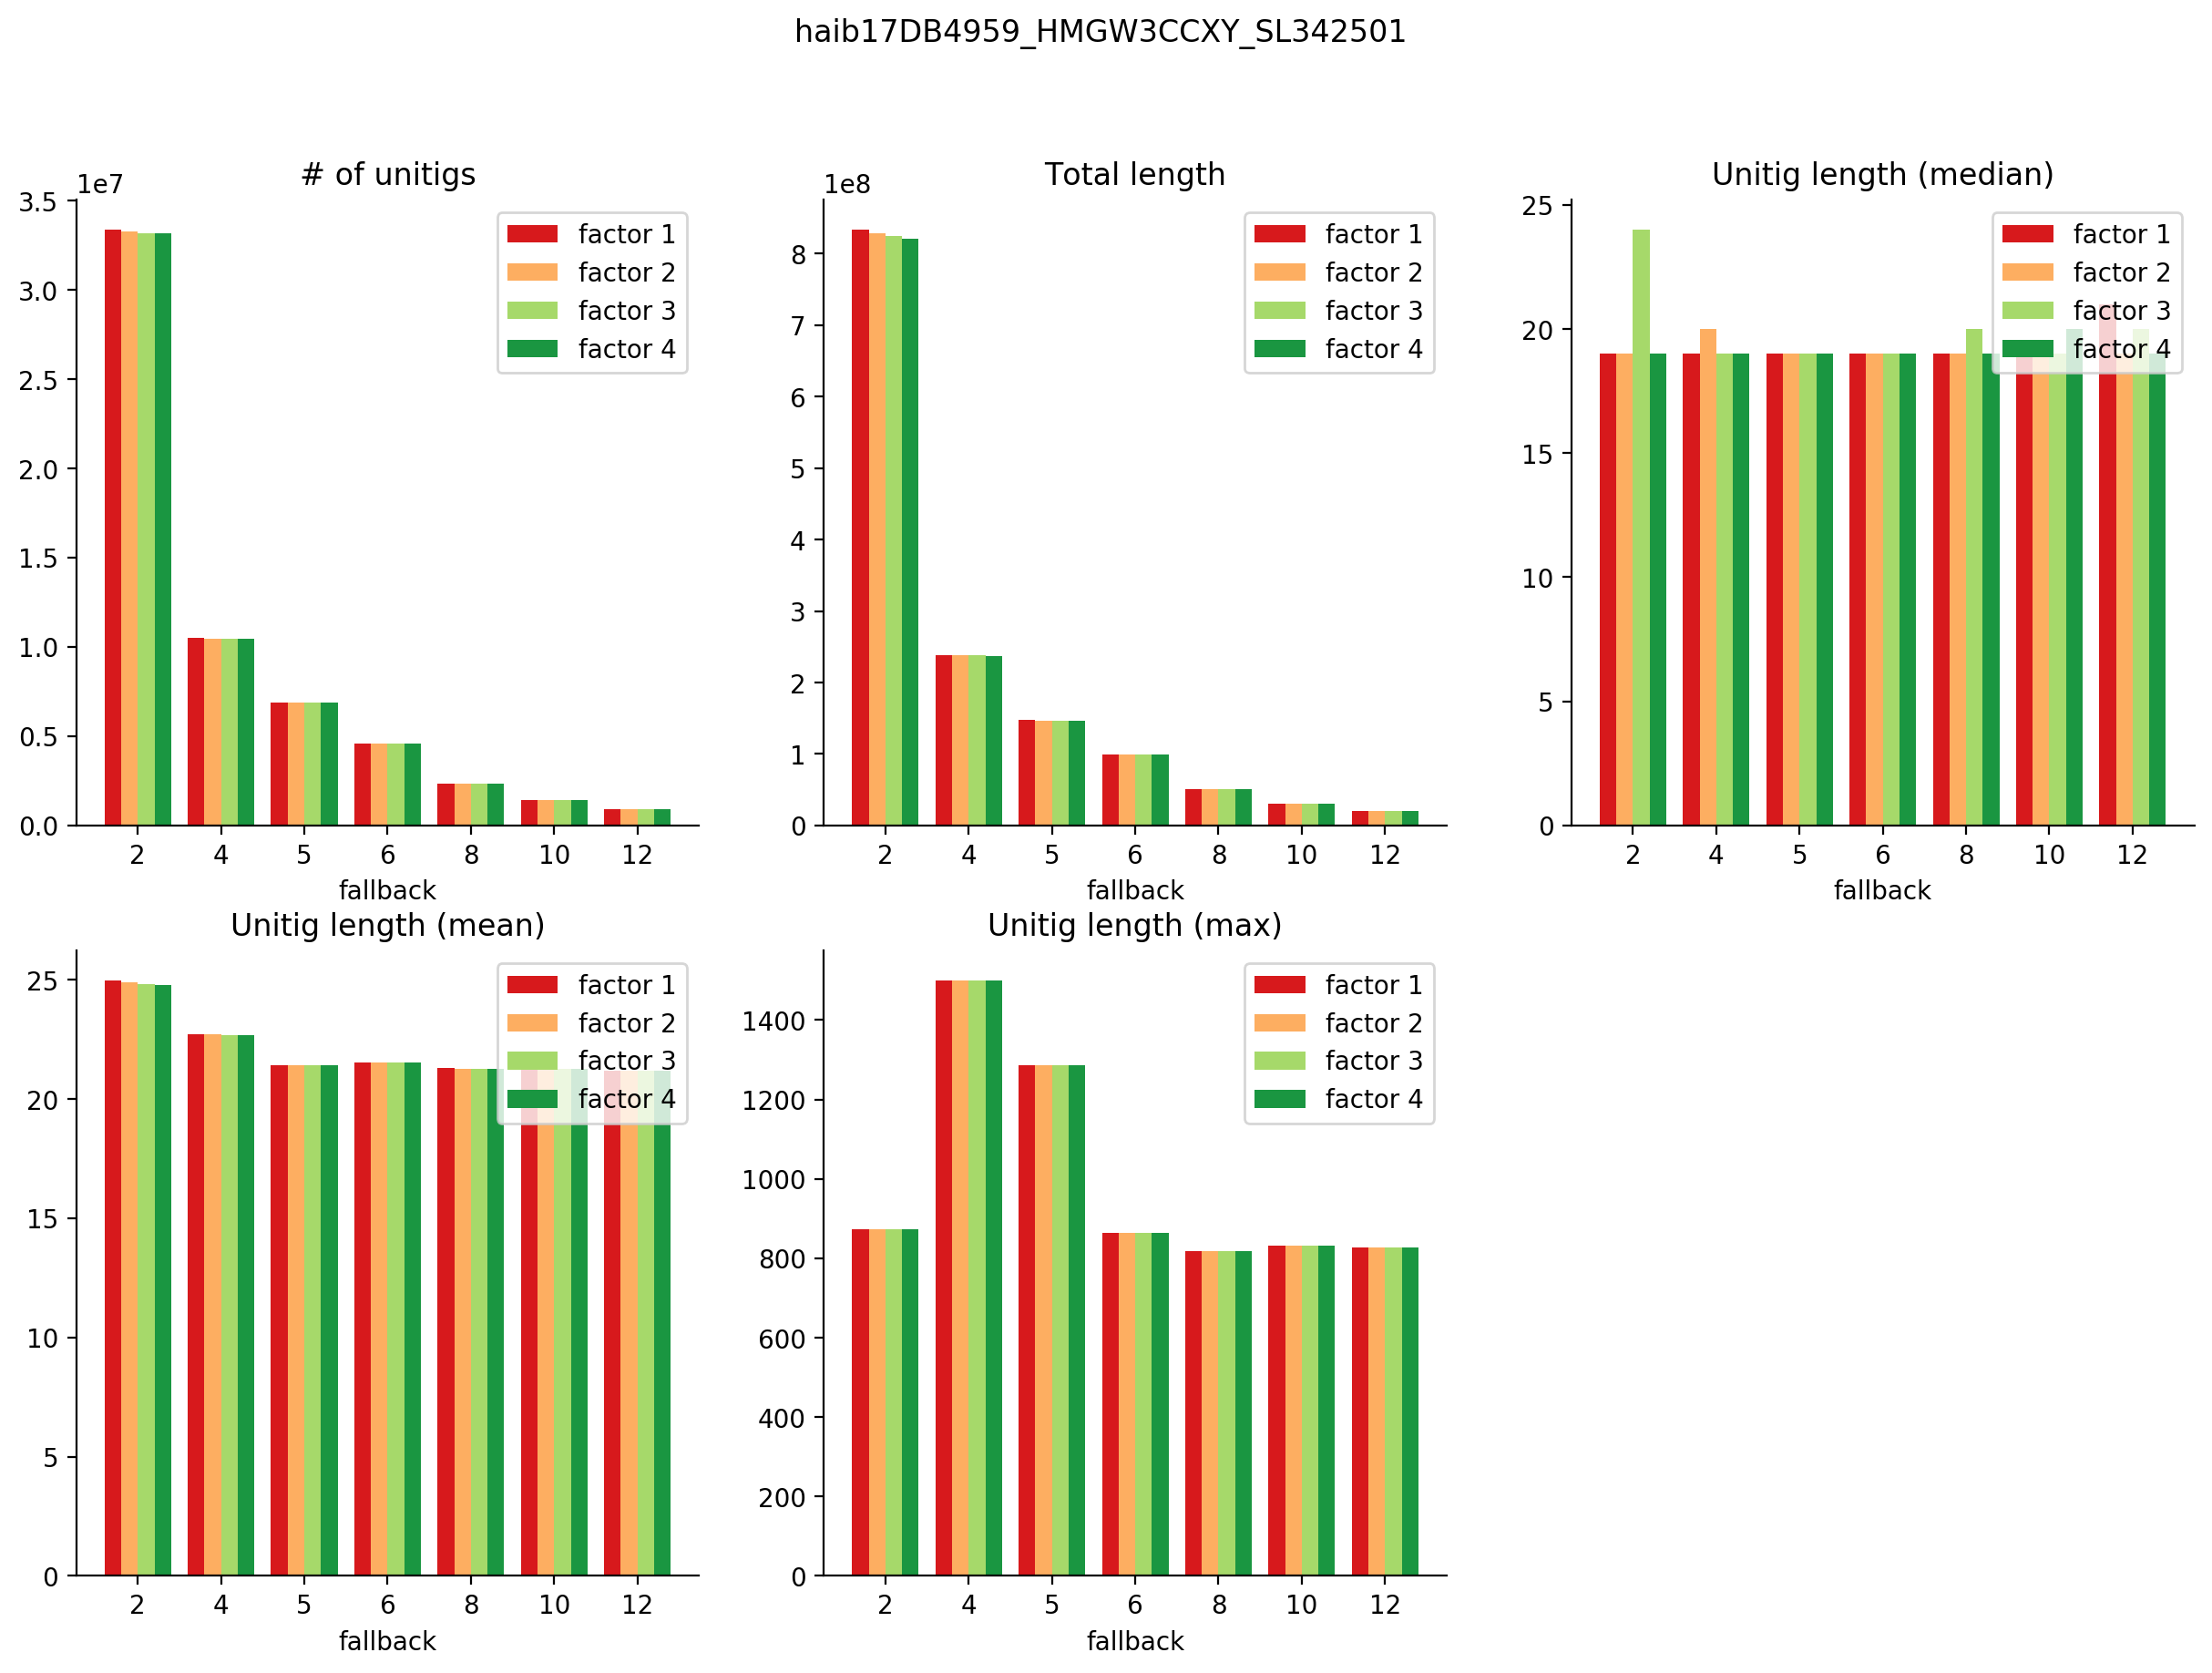

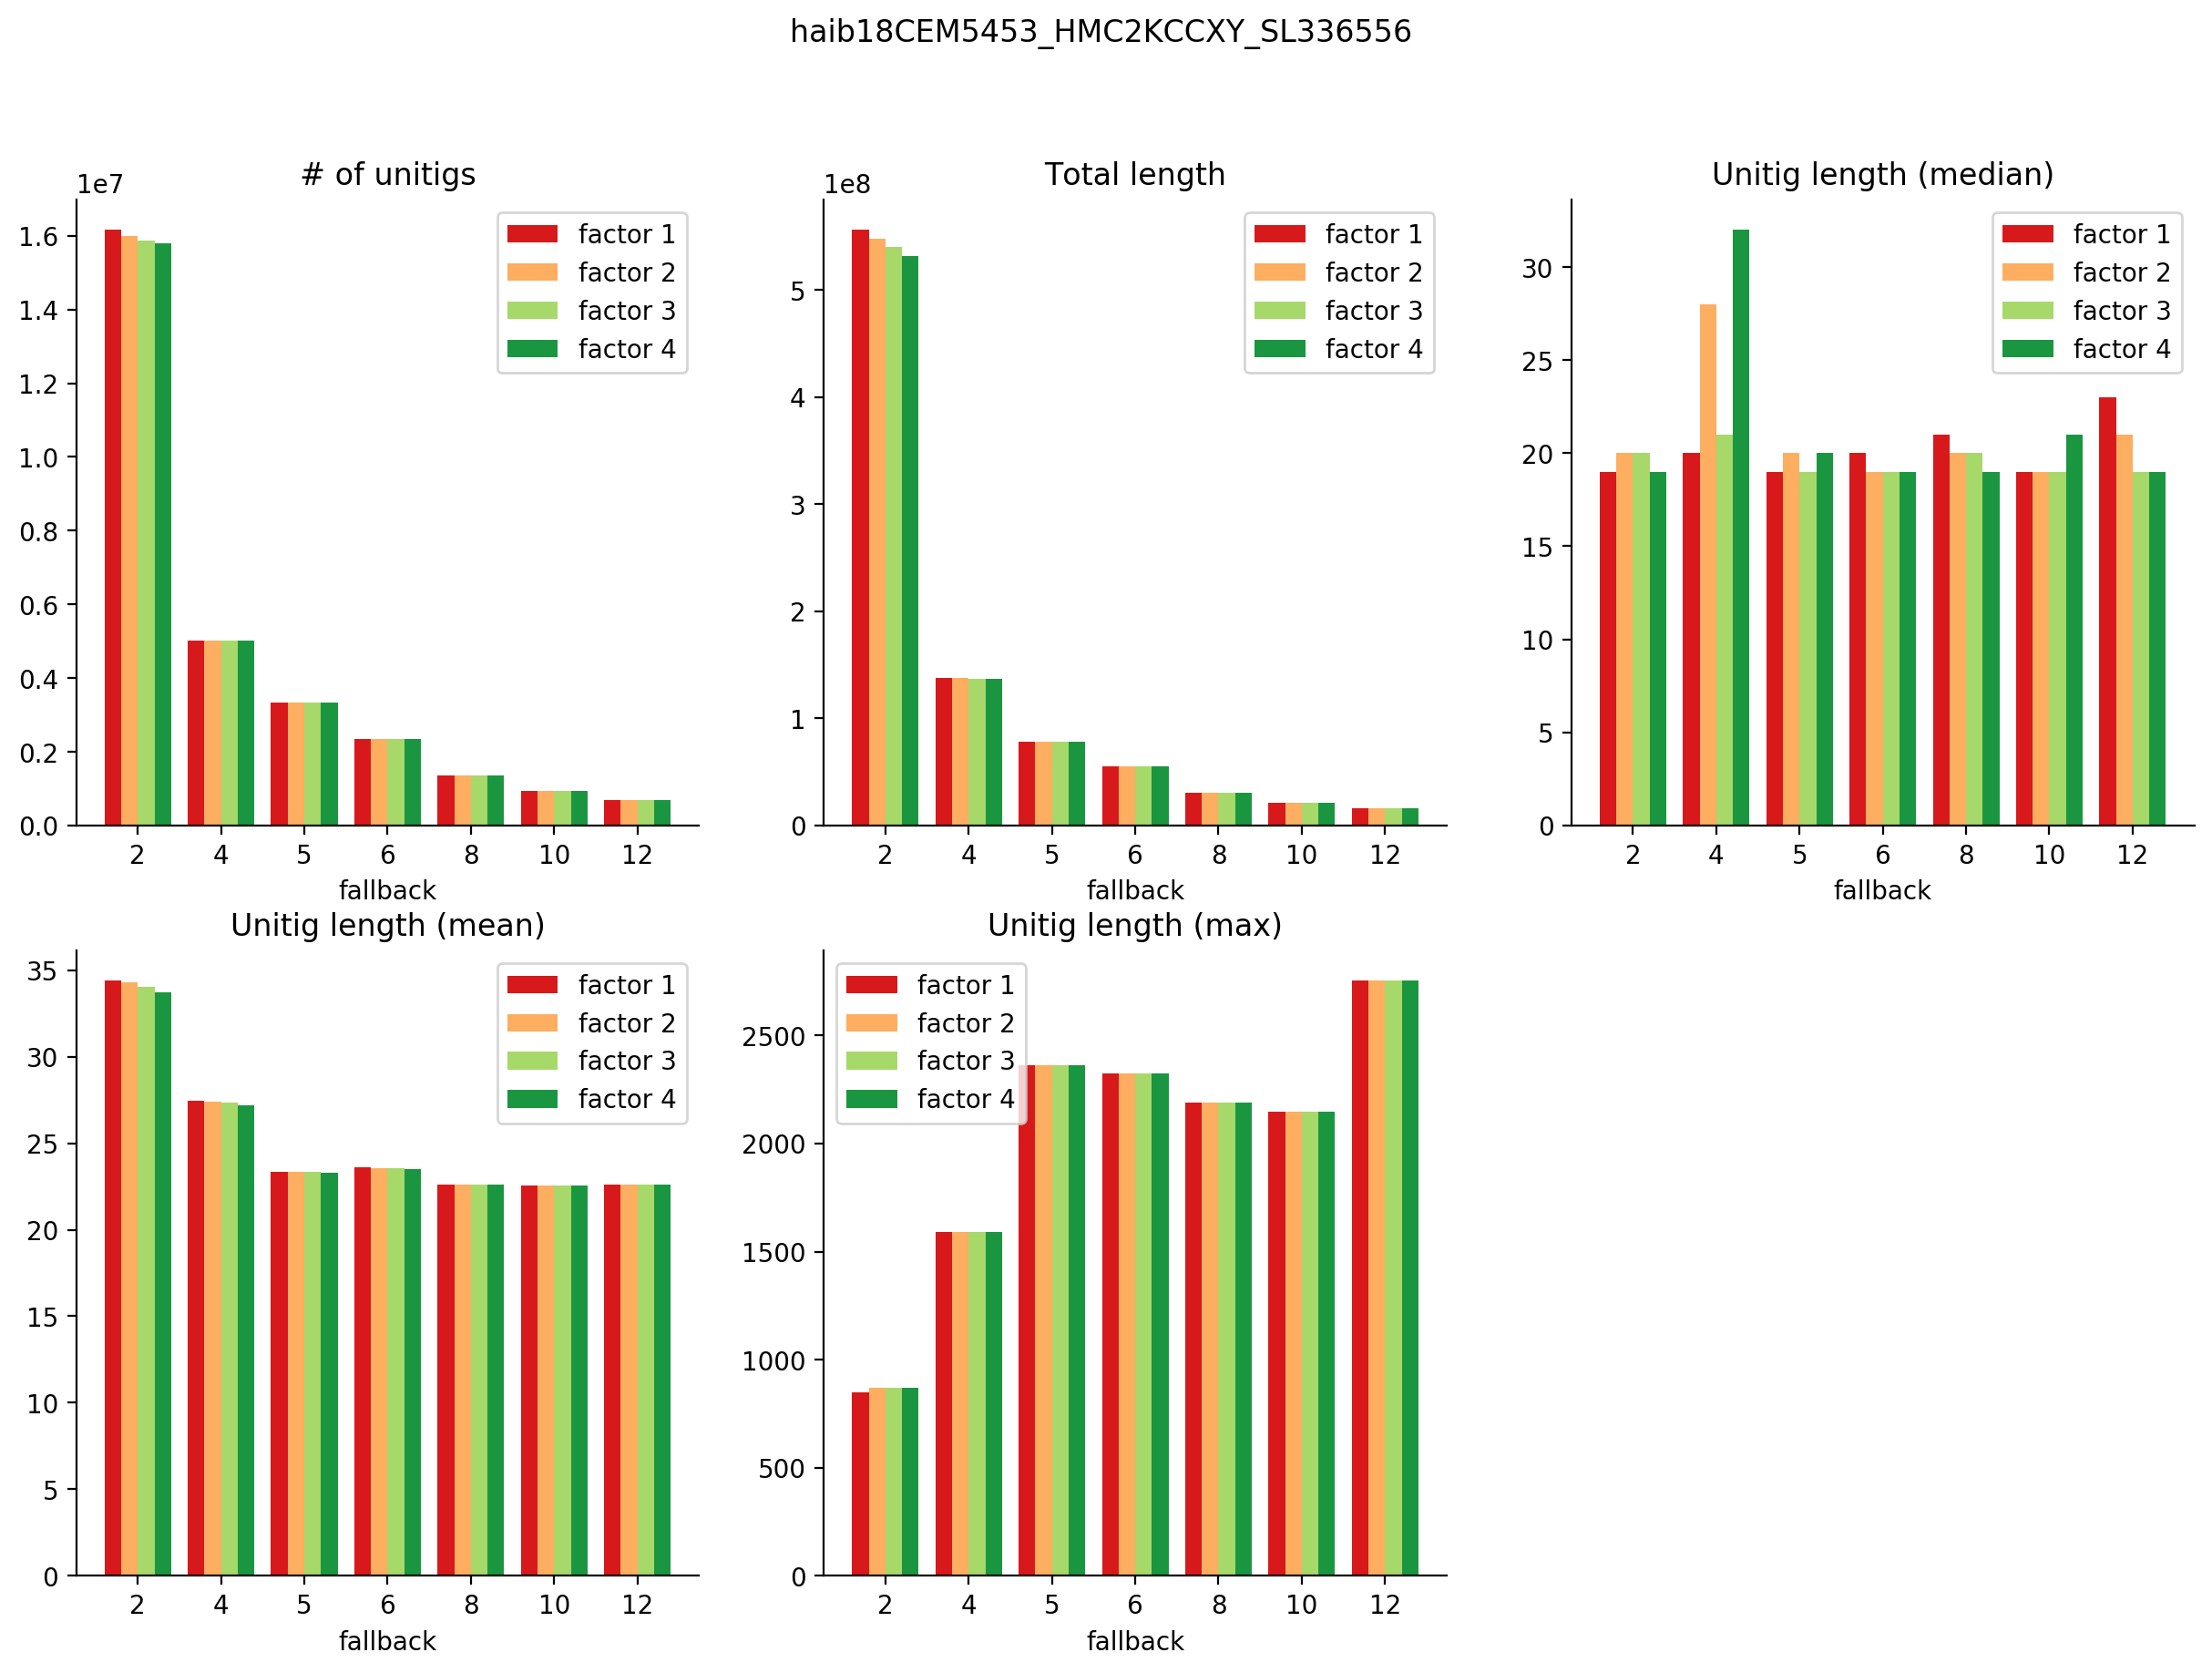

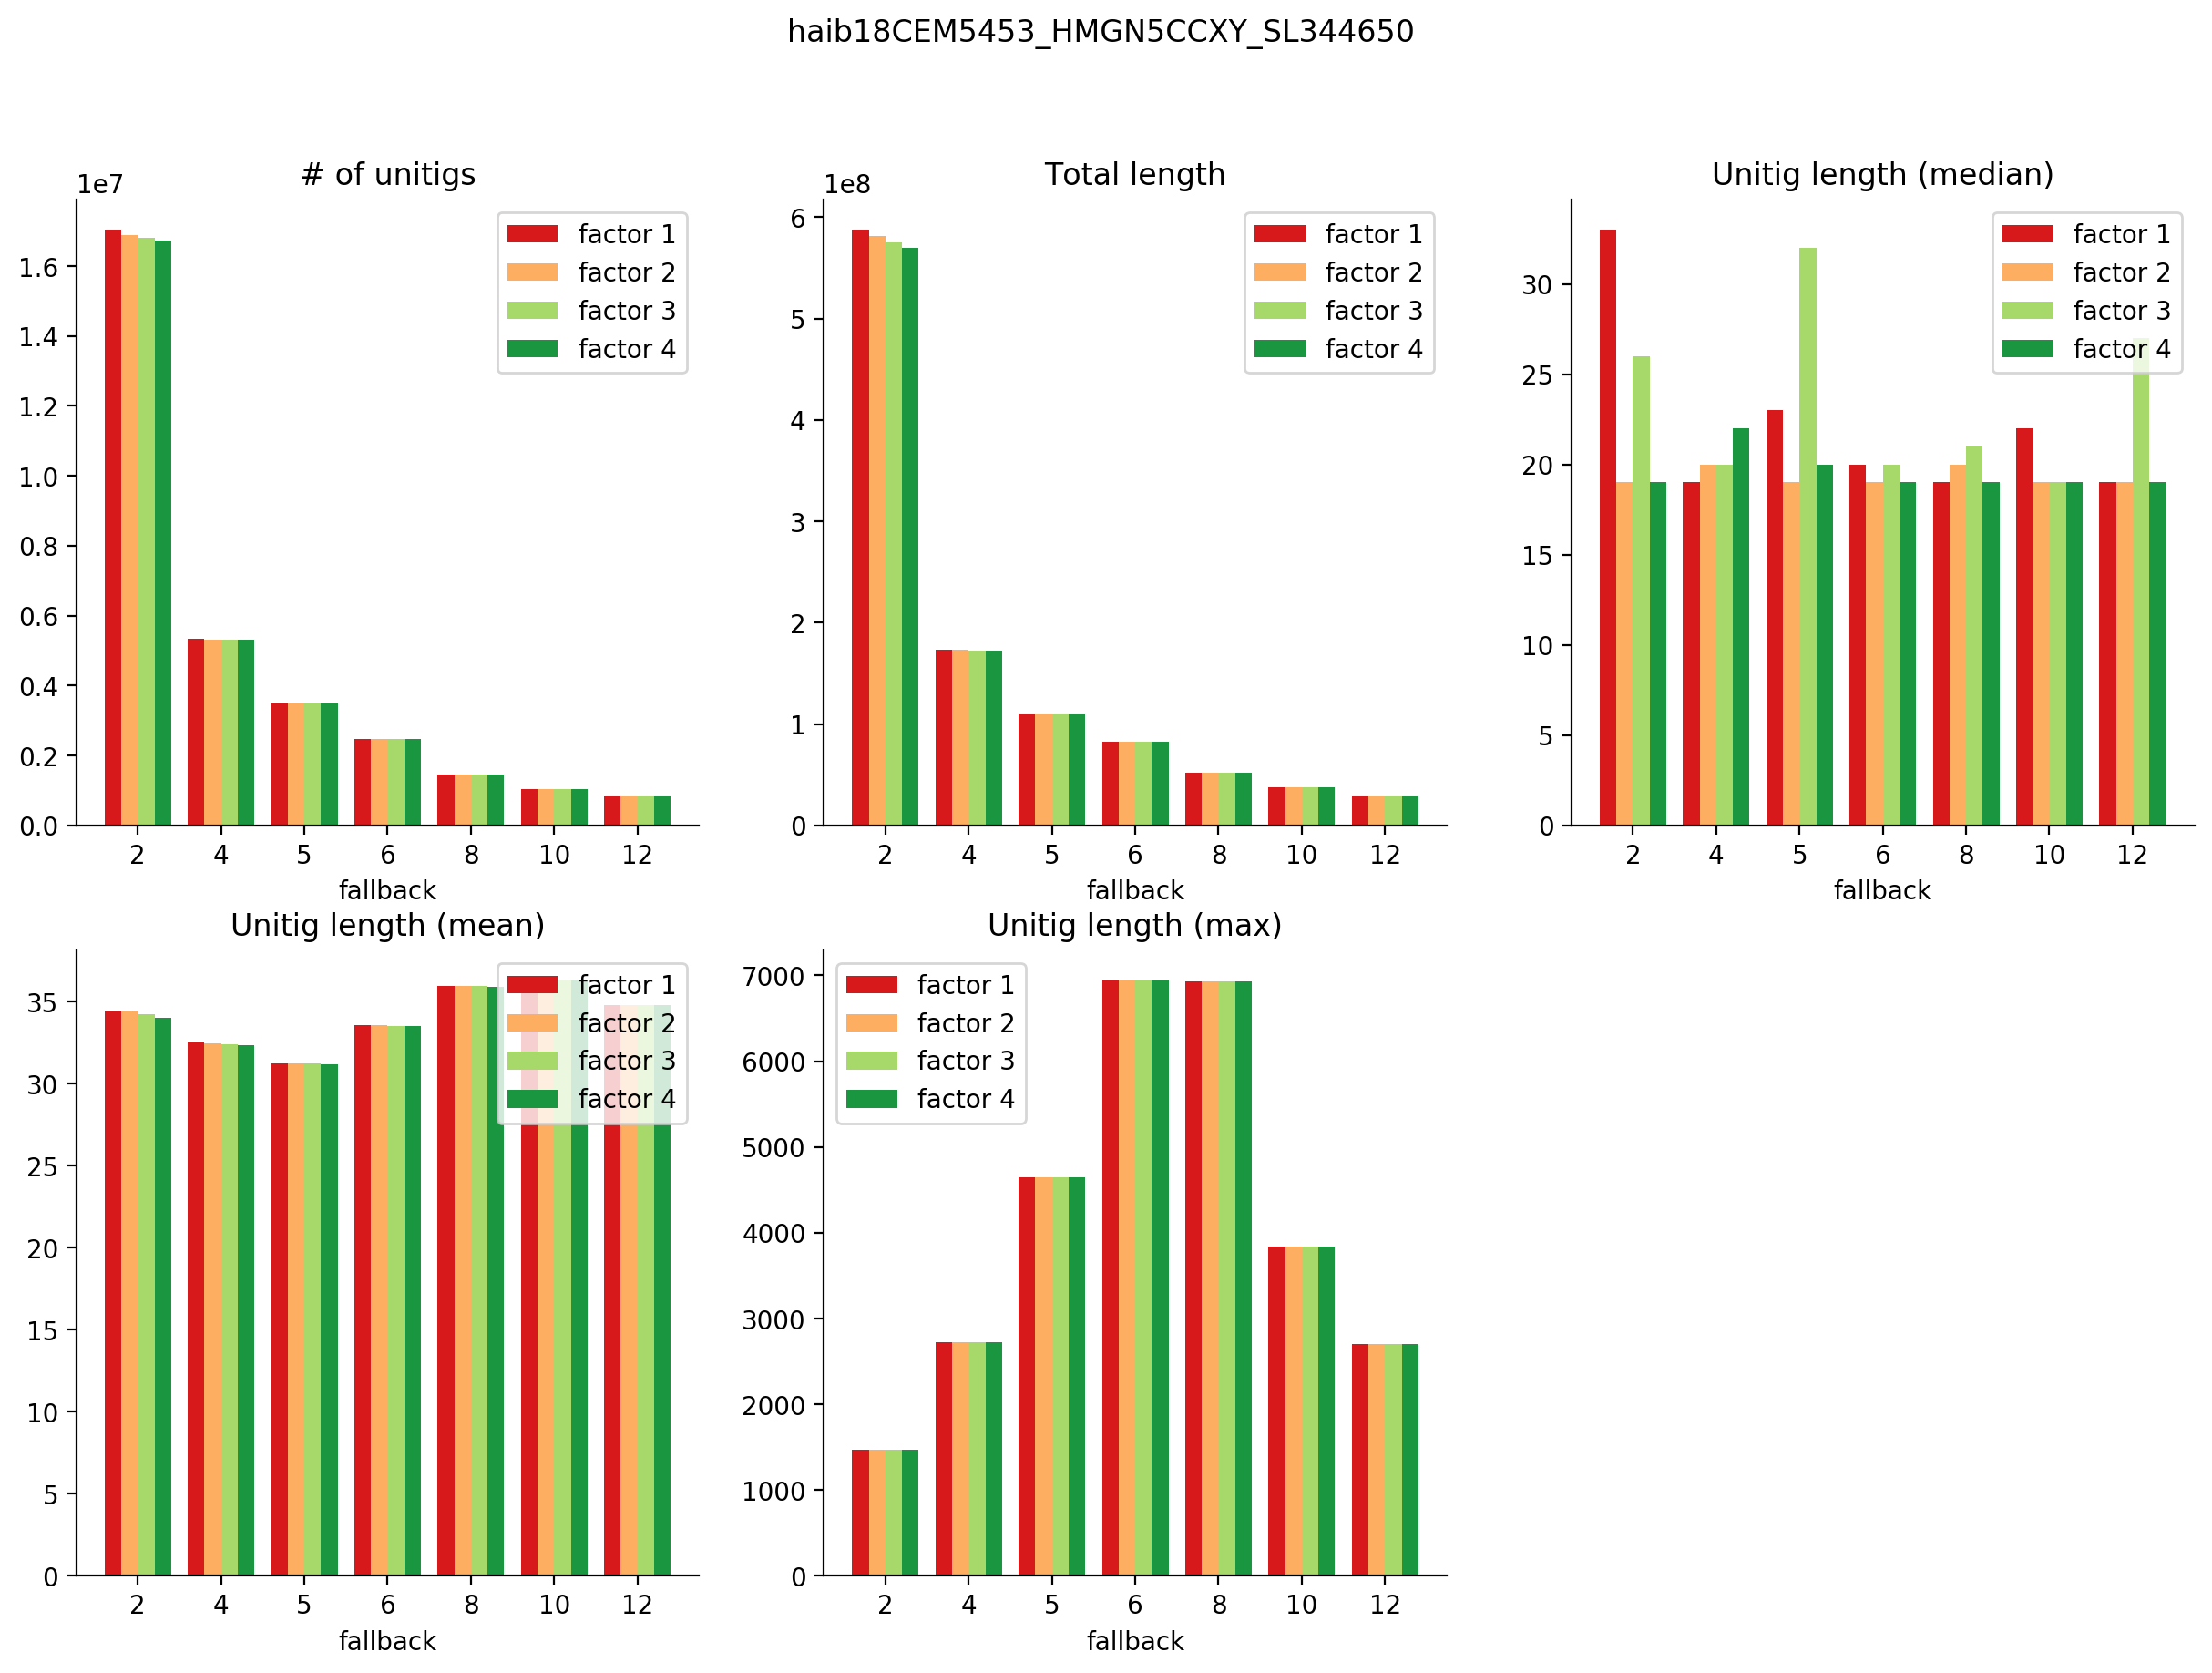

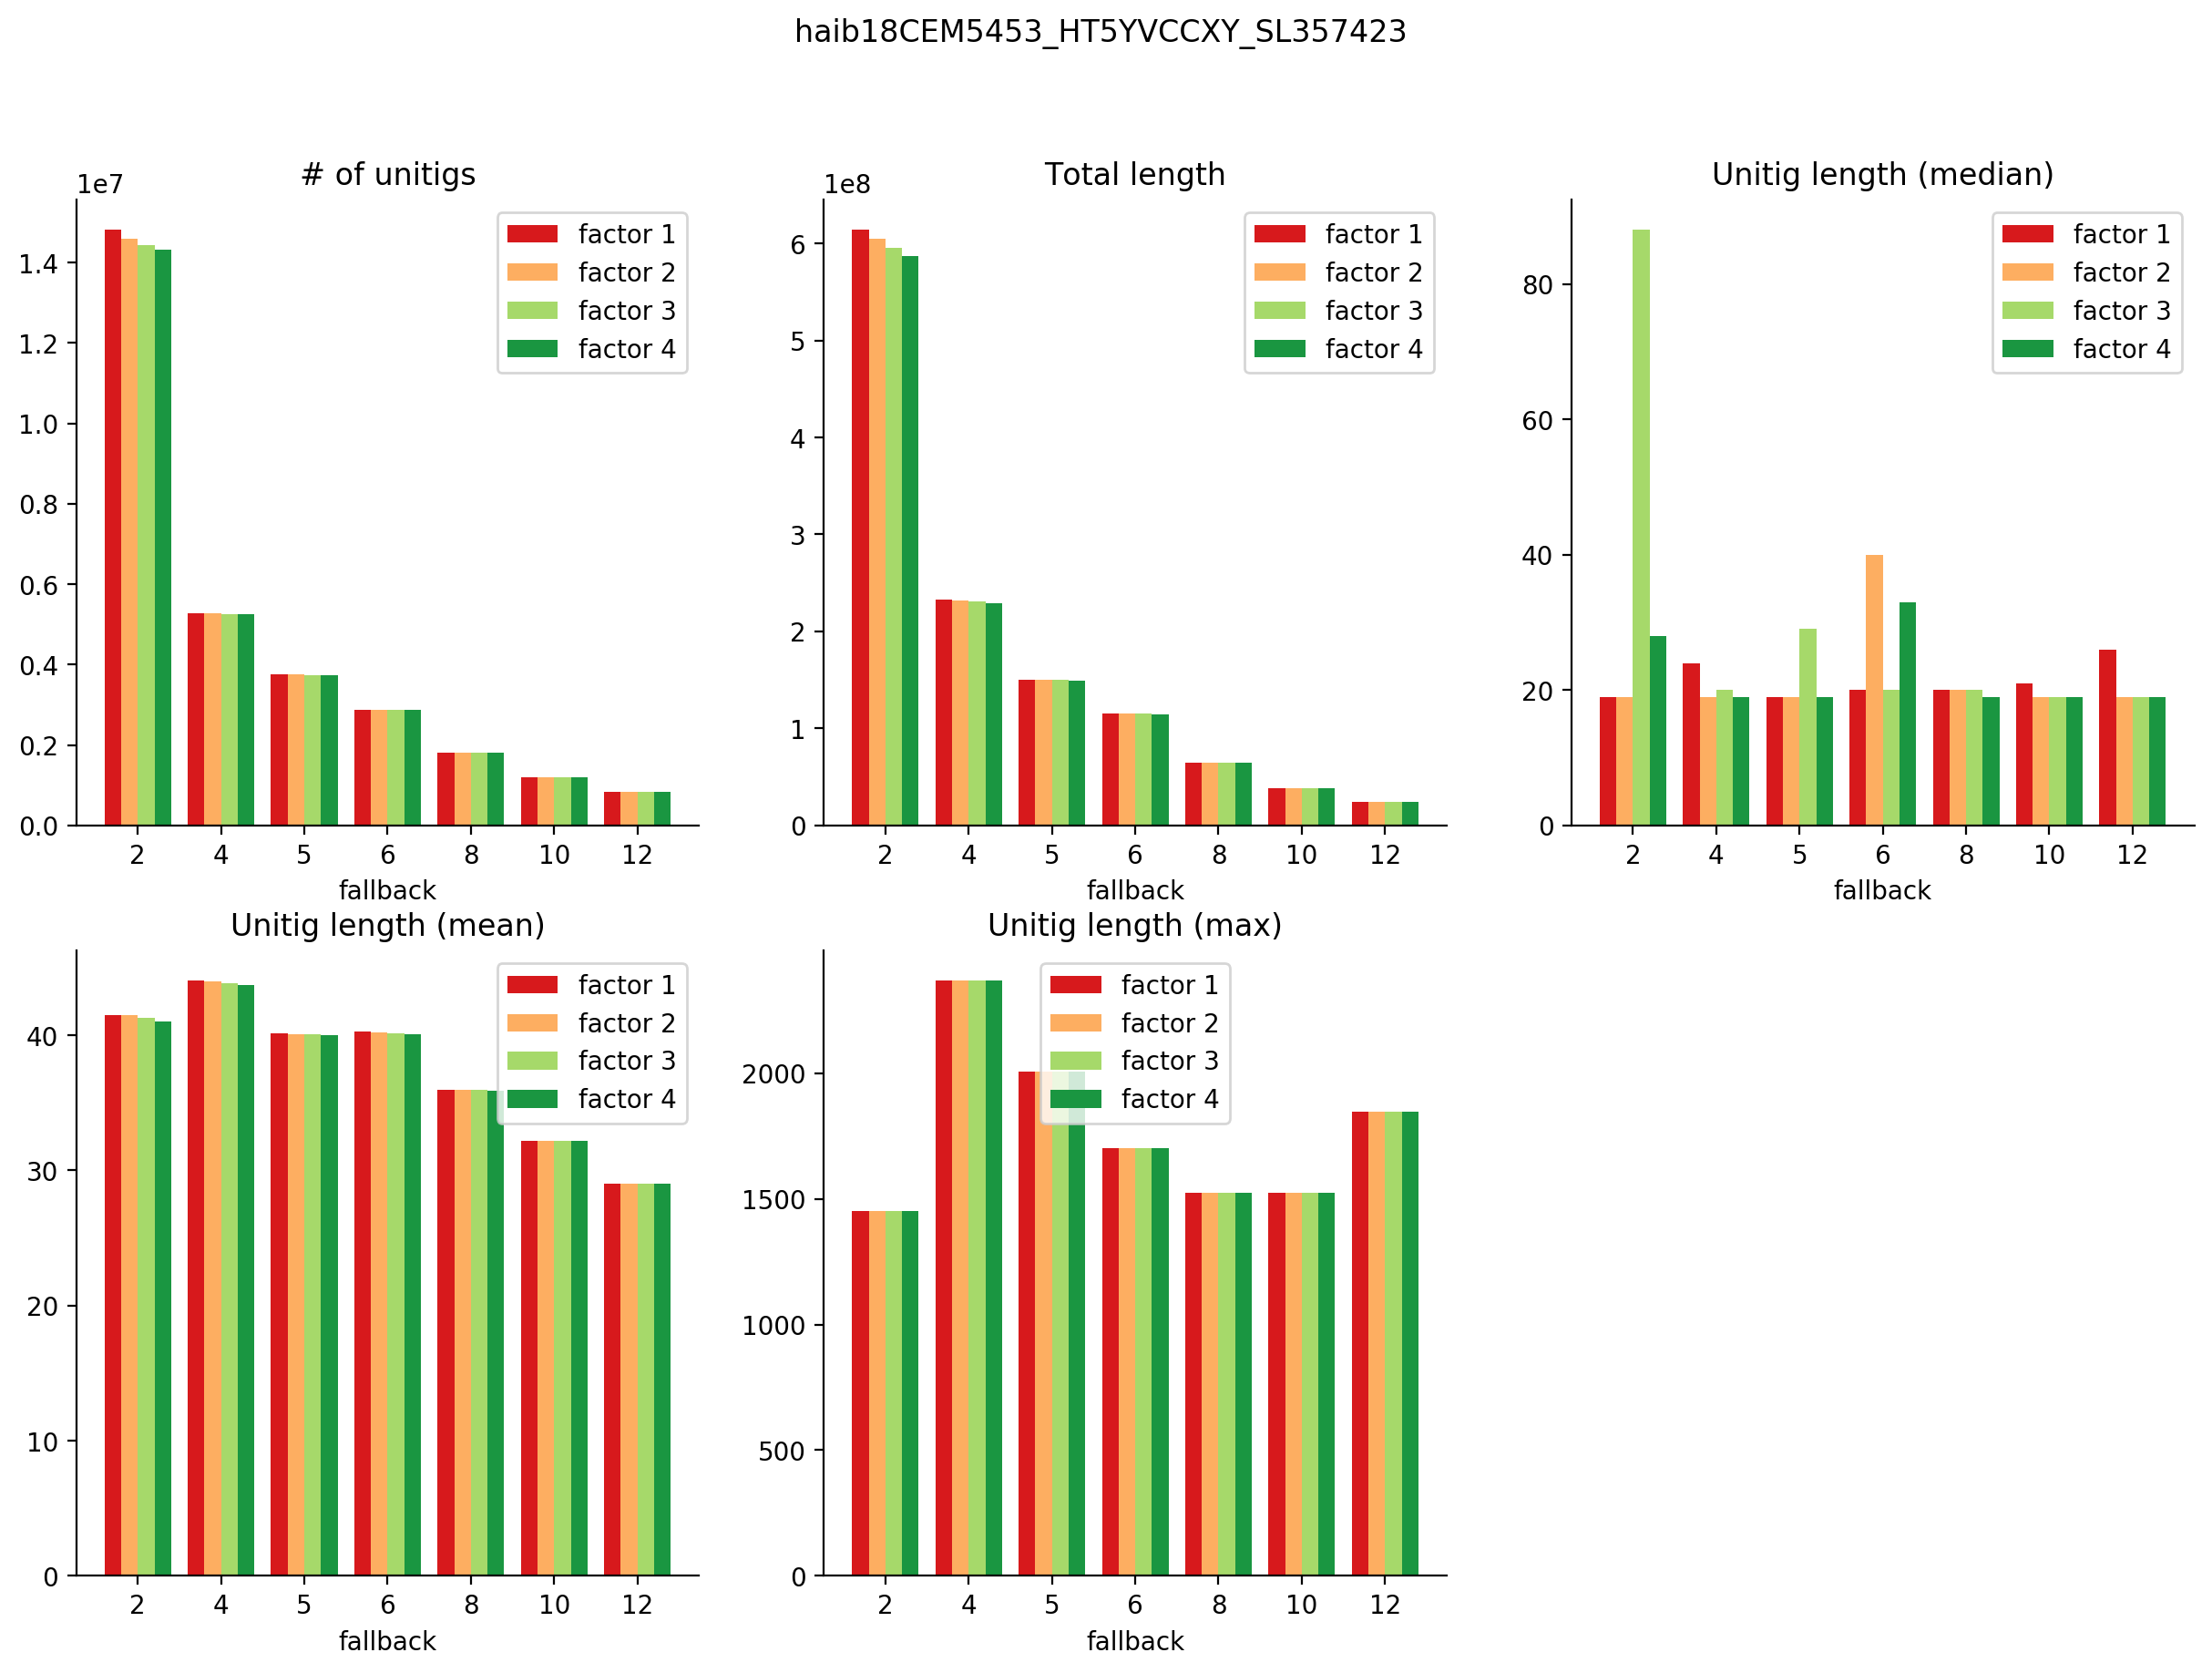

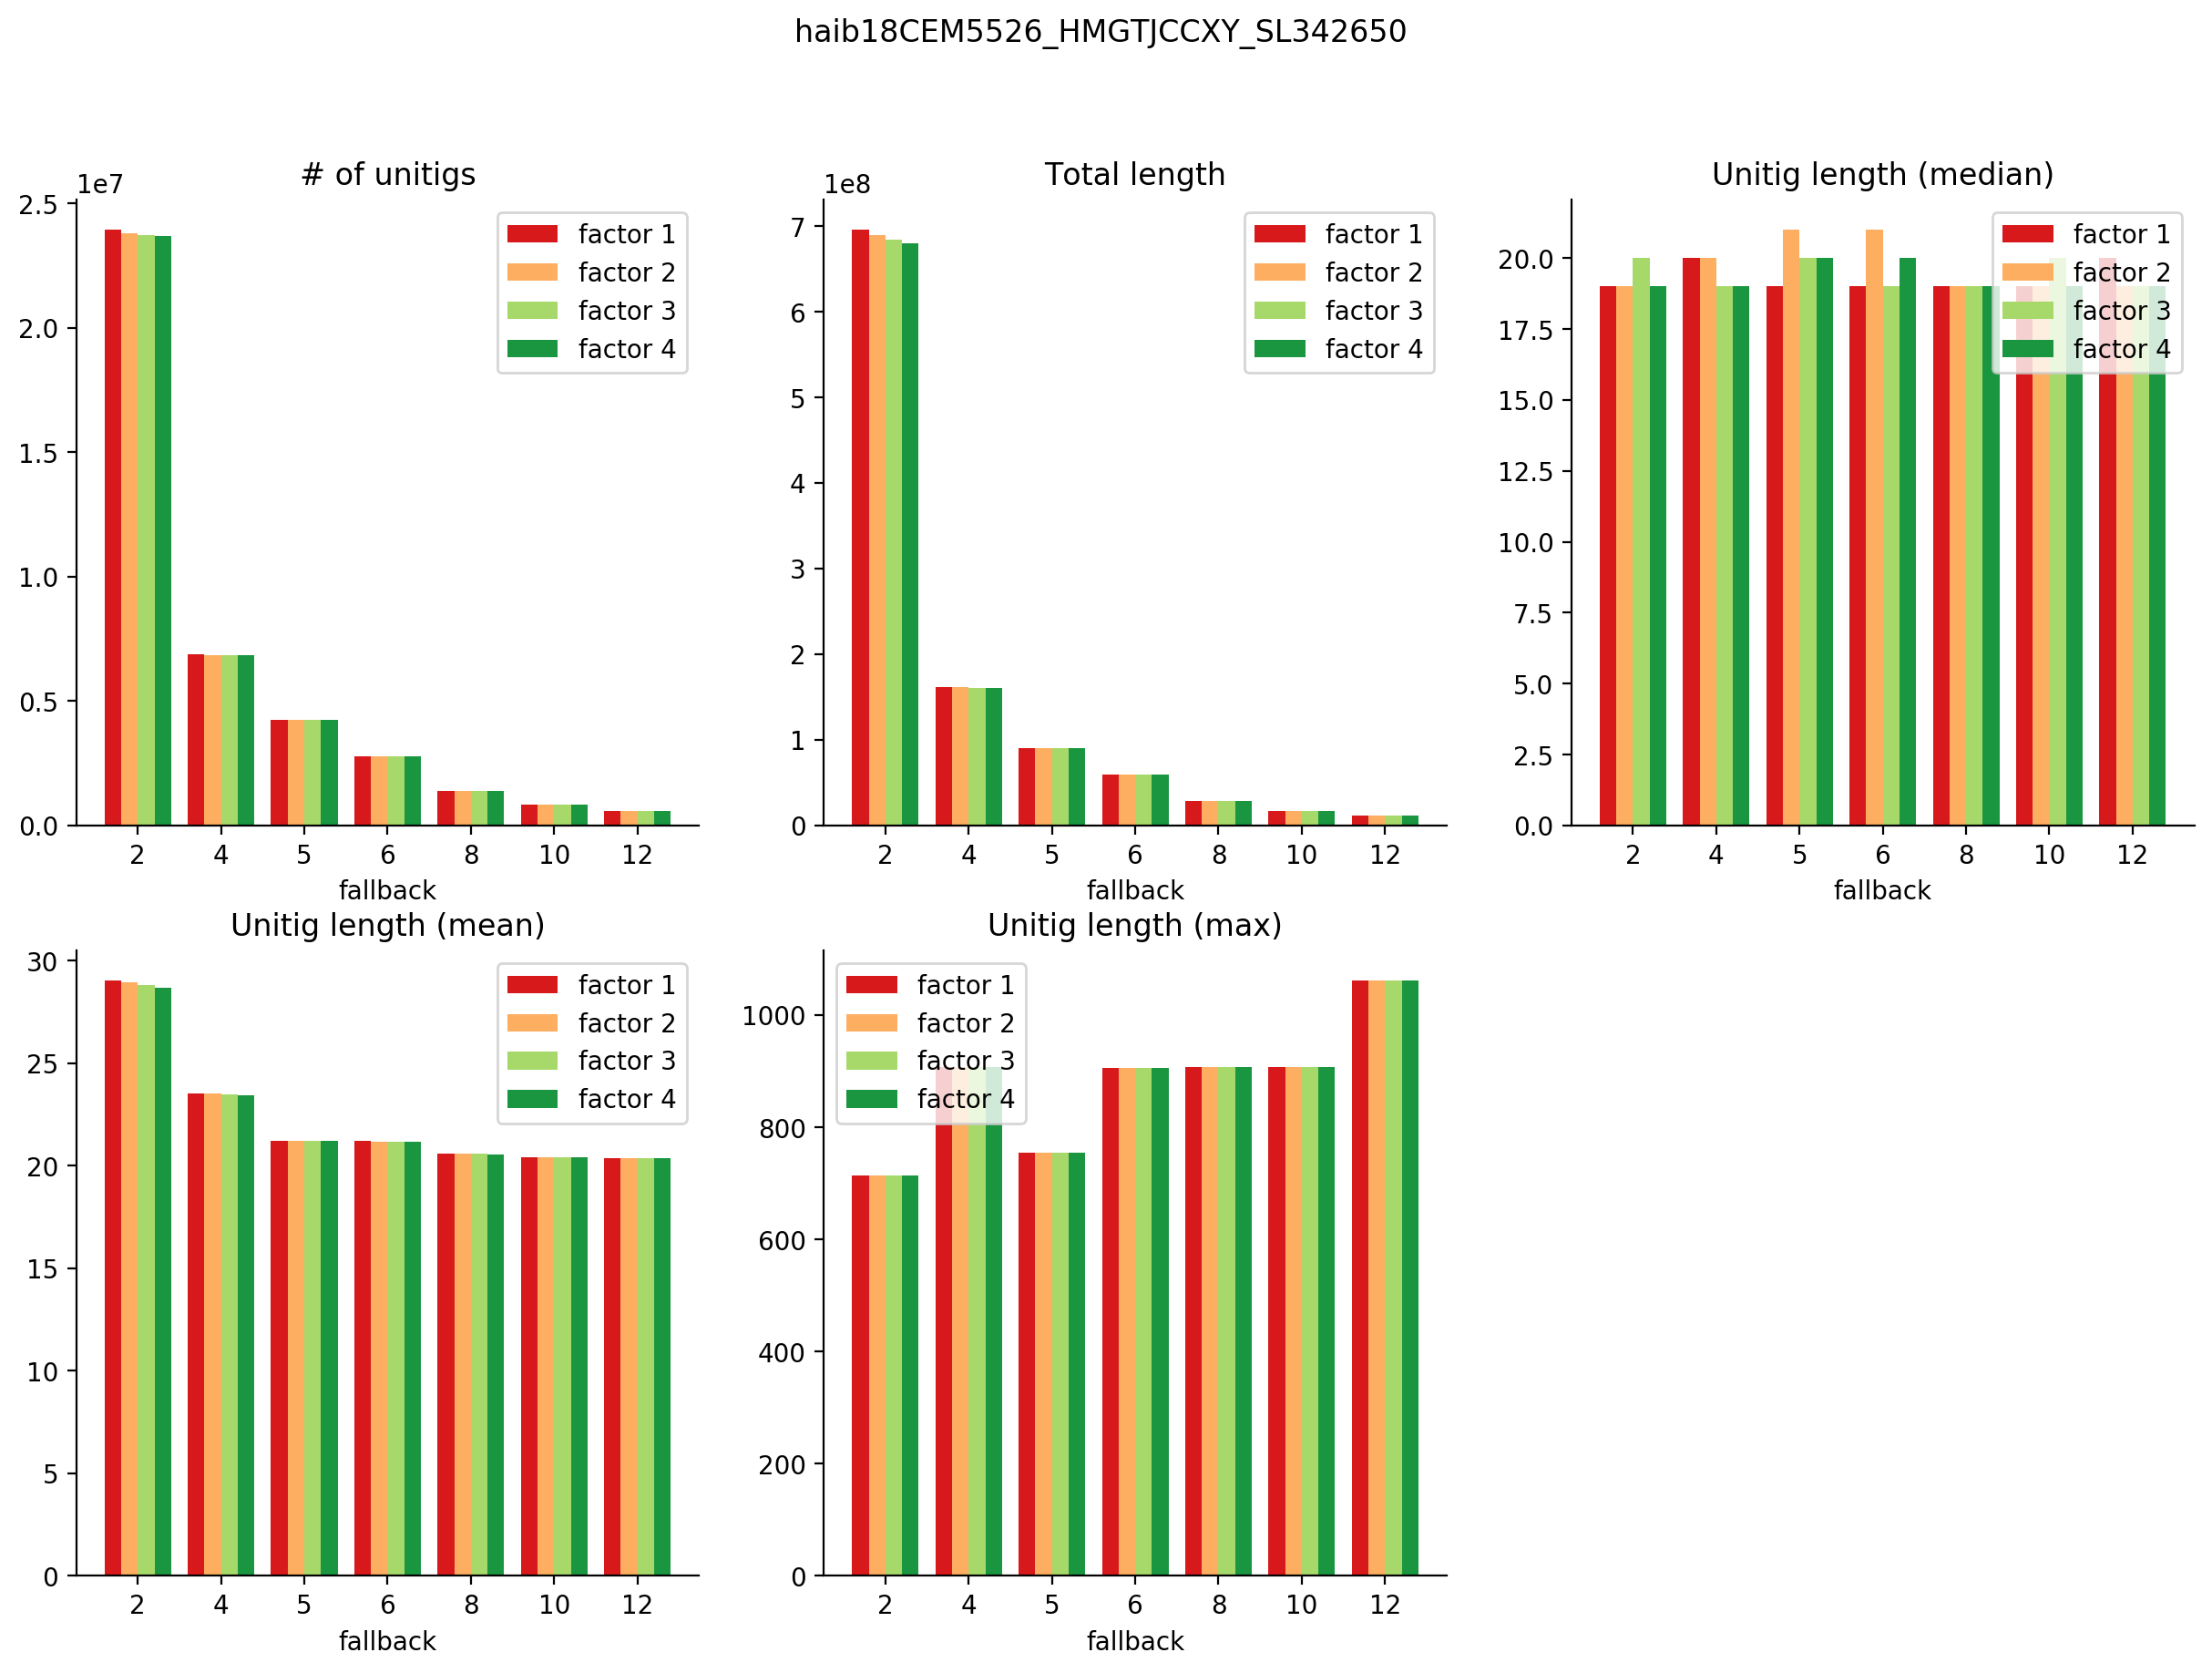

In [5]:
gs = gridspec.GridSpec(2, 3)
#colors = ['r', 'g', 'b', 'm']
colors = ['#d7191c',
'#fdae61',
'#a6d96a',
'#1a9641']

tfs = sp.arange(4) + 1

for sample in samples:
    curr_data = []
    for tf in tfs:
        sidx = sp.where([_.startswith(sample) and 'tf_%i' % tf in _ for _ in fnames])[0]
        fbs = sp.array([int(_.split('.')[2].split('_')[1]) for _ in fnames[sidx]])
        ssidx = sp.argsort(fbs)
        fbs = fbs[ssidx]
        sidx = sidx[ssidx]
        curr_data.append(all_data[sidx])
    curr_data = sp.array(curr_data)
    
    fig = plt.figure(figsize=(15, 10), dpi=200)
    ### total counts
    ax = fig.add_subplot(gs[0, 0])
    for i in range(len(tfs)):
        ax.bar(sp.arange(curr_data.shape[1]) + 0.2*i, curr_data[i, :, 0], width=0.2, color=colors[i], label='factor %i' % tfs[i])
    ax.legend()
    axs.clean_axis(ax)
    ax.set_title('# of unitigs')
    ax.set_xticks(sp.arange(curr_data.shape[1]) + 0.3)
    ax.set_xticklabels(fbs)
    ax.set_xlabel('fallback')
    ### total length
    ax = fig.add_subplot(gs[0, 1])
    for i in range(len(tfs)):
        ax.bar(sp.arange(curr_data.shape[1]) + 0.2*i, curr_data[i, :, 1], width=0.2, color=colors[i], label='factor %i' % tfs[i])
    ax.legend()
    axs.clean_axis(ax)
    ax.set_title('Total length')
    ax.set_xticks(sp.arange(curr_data.shape[1]) + 0.3)
    ax.set_xticklabels(fbs)
    ax.set_xlabel('fallback')
    ### median unitig length
    ax = fig.add_subplot(gs[0, 2])
    for i in range(len(tfs)):
        ax.bar(sp.arange(curr_data.shape[1]) + 0.2*i, curr_data[i, :, 2], width=0.2, color=colors[i], label='factor %i' % tfs[i])
    ax.legend()
    axs.clean_axis(ax)
    ax.set_title('Unitig length (median)')
    ax.set_xticks(sp.arange(curr_data.shape[1]) + 0.3)
    ax.set_xticklabels(fbs)
    ax.set_xlabel('fallback')
    ### mean unitig length
    ax = fig.add_subplot(gs[1, 0])
    for i in range(len(tfs)):
        ax.bar(sp.arange(curr_data.shape[1]) + 0.2*i, curr_data[i, :, 3], width=0.2, color=colors[i], label='factor %i' % tfs[i])
    ax.legend()
    axs.clean_axis(ax)
    ax.set_title('Unitig length (mean)')
    ax.set_xticks(sp.arange(curr_data.shape[1]) + 0.3)
    ax.set_xticklabels(fbs)
    ax.set_xlabel('fallback')
    ### max unitig length
    ax = fig.add_subplot(gs[1, 1])
    for i in range(len(tfs)):
        ax.bar(sp.arange(curr_data.shape[1]) + 0.2*i, curr_data[i, :, 4], width=0.2, color=colors[i], label='factor %i' % tfs[i])
    ax.legend()
    axs.clean_axis(ax)
    ax.set_title('Unitig length (max)')
    ax.set_xticks(sp.arange(curr_data.shape[1]) + 0.3)
    ax.set_xticklabels(fbs)
    ax.set_xlabel('fallback')
    plt.suptitle(sample)
    plt.savefig(os.path.join(plotdir, '%s_pstudy.png' % sample), format='png', bbox_inches='tight')
    plt.show()